In [1]:
# Importing the essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 300

In [2]:
import torch

In [3]:
# Reading the files and storing in the object fold_0
fold_0 = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_0.csv") #128
fold_1 = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_1.csv") #129
fold_2 = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_2.csv") #127
fold_3 = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_3.csv") #130
fold_4 = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_4.csv") #128
fold_test = pd.read_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/test.csv") #36

In [4]:
fold_0["data"] = "fold_0"
fold_1["data"] = "fold_1"
fold_2["data"] = "fold_2"
fold_3["data"] = "fold_3"
fold_4["data"] = "fold_4"
fold_test["data"] = "fold_test"

In [5]:
fold_test["allele"] = fold_test["allele"].str[:-5] + '*' + fold_test["allele"].str[-5:]

In [6]:
fold_0["length"] = fold_0["peptide"].str.len()
fold_1["length"] = fold_1["peptide"].str.len()
fold_2["length"] = fold_2["peptide"].str.len()
fold_3["length"] = fold_3["peptide"].str.len()
fold_4["length"] = fold_4["peptide"].str.len()
fold_test["length"] = fold_test["peptide"].str.len()

In [7]:
frames = [fold_0, fold_1, fold_2,fold_3,fold_4]
fold_train = pd.concat(frames)

In [8]:
fold_train

,peptide,allele,hit,data,length
0,YFPLAPFNQL,HLA-C*14:02,1,fold_0,10
1,KESKINQVF,HLA-B*44:02,1,fold_0,9
2,QPHDPLVPLSA,HLA-B*54:01,1,fold_0,11
3,RTIADSLINSF,HLA-B*57:03,1,fold_0,11
4,EEKTIIKKL,HLA-B*44:03,1,fold_0,9
...,...,...,...,...,...
735684,YTLSSDQA,HLA-C*17:01,0,fold_4,8
735685,YVKNPEIFT,HLA-C*17:01,0,fold_4,9
735686,YVTEEDGT,HLA-C*17:01,0,fold_4,8
735687,YWSLHQTTPSS,HLA-C*17:01,0,fold_4,11


In [9]:
set(fold_test["allele"].unique()).issubset(fold_train["allele"].unique())

False

In [10]:
out_of_sample = np.setdiff1d(np.sort(fold_test["allele"].unique()),np.intersect1d(fold_test["allele"].unique(),fold_train["allele"].unique()))

In [11]:
out_of_sample

array(['HLA-A*02:02', 'HLA-A*02:11', 'HLA-A*33:01', 'HLA-B*53:01'],
      dtype=object)

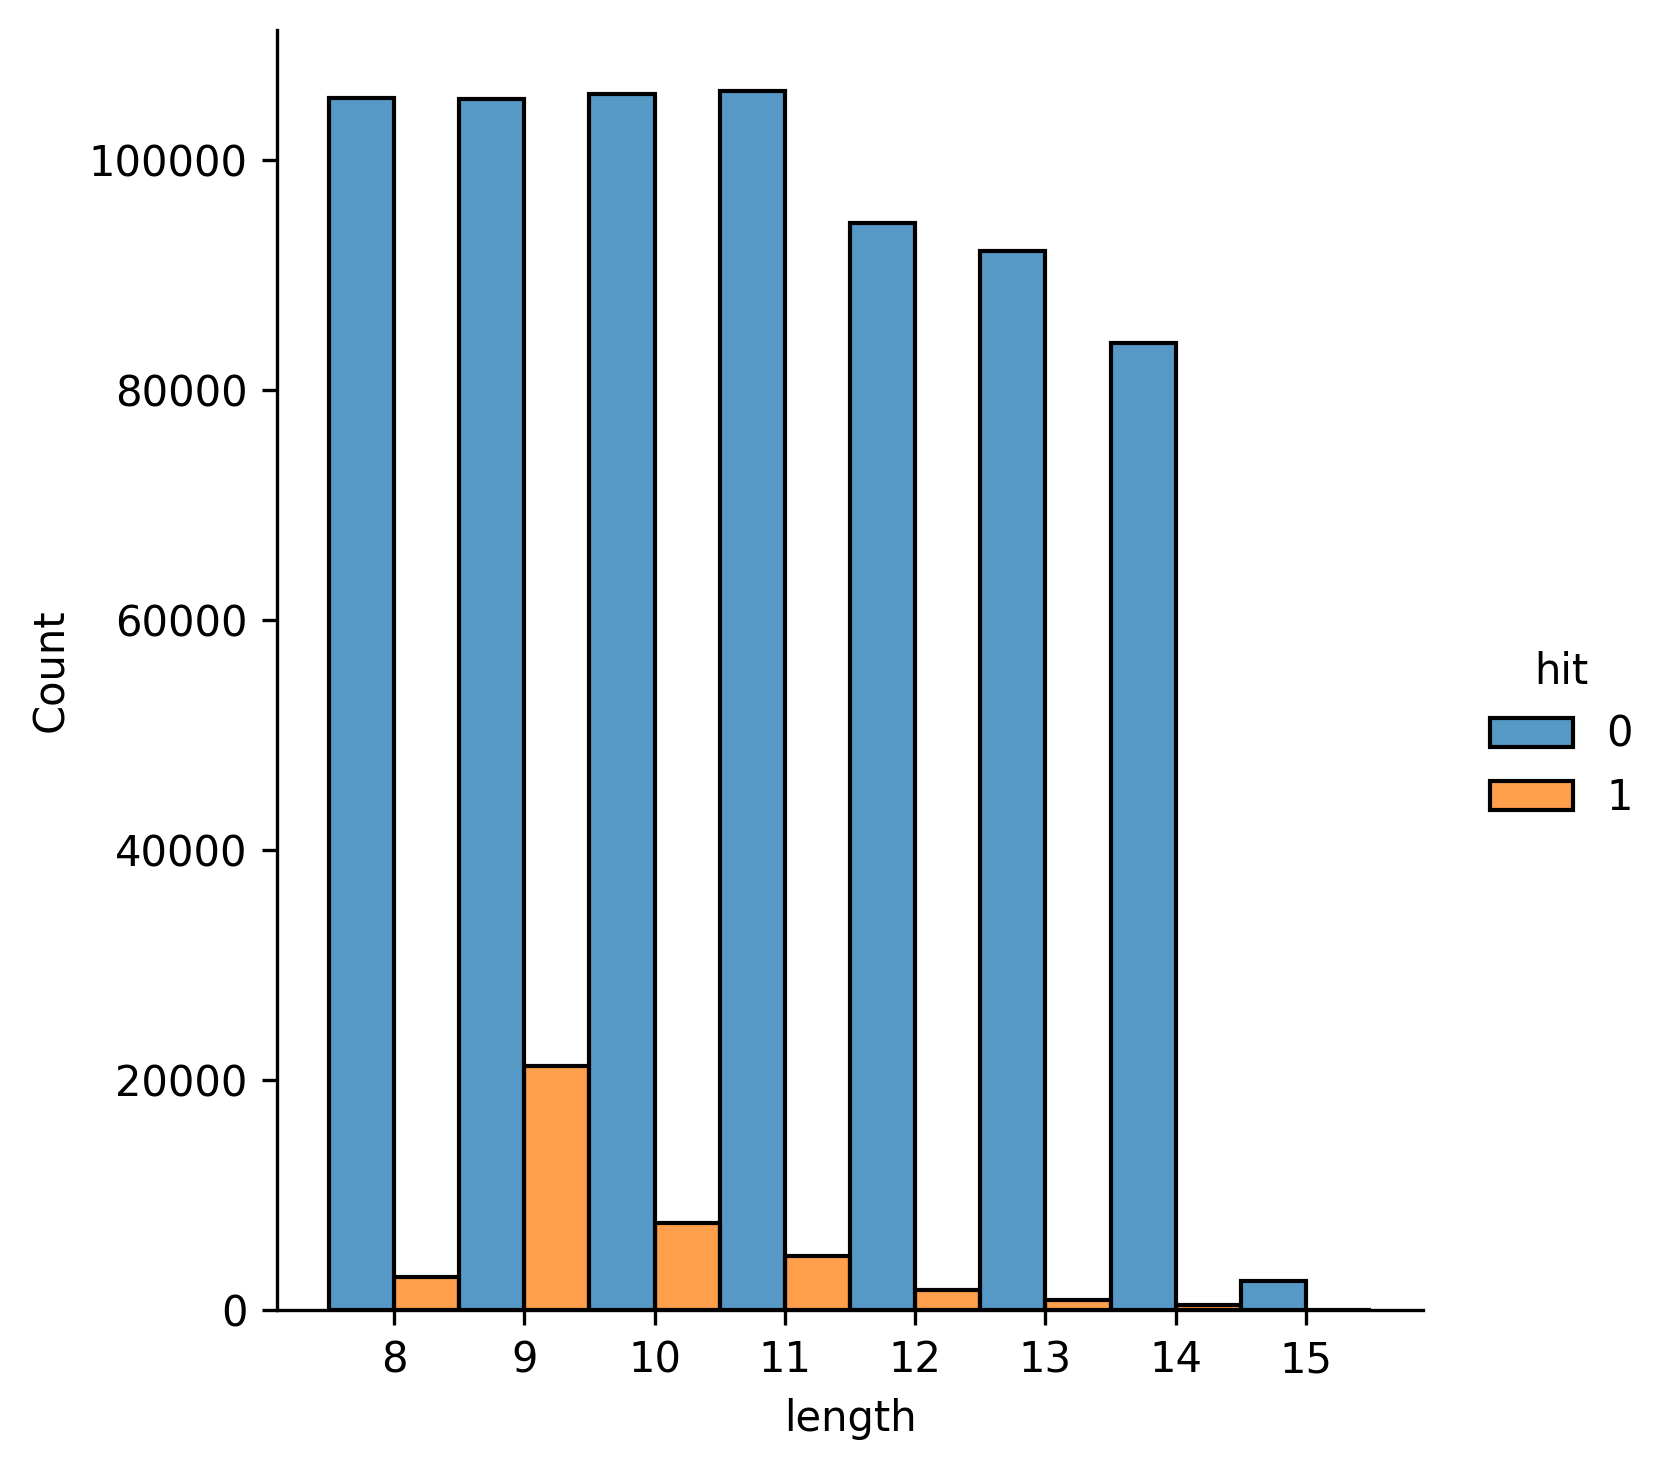

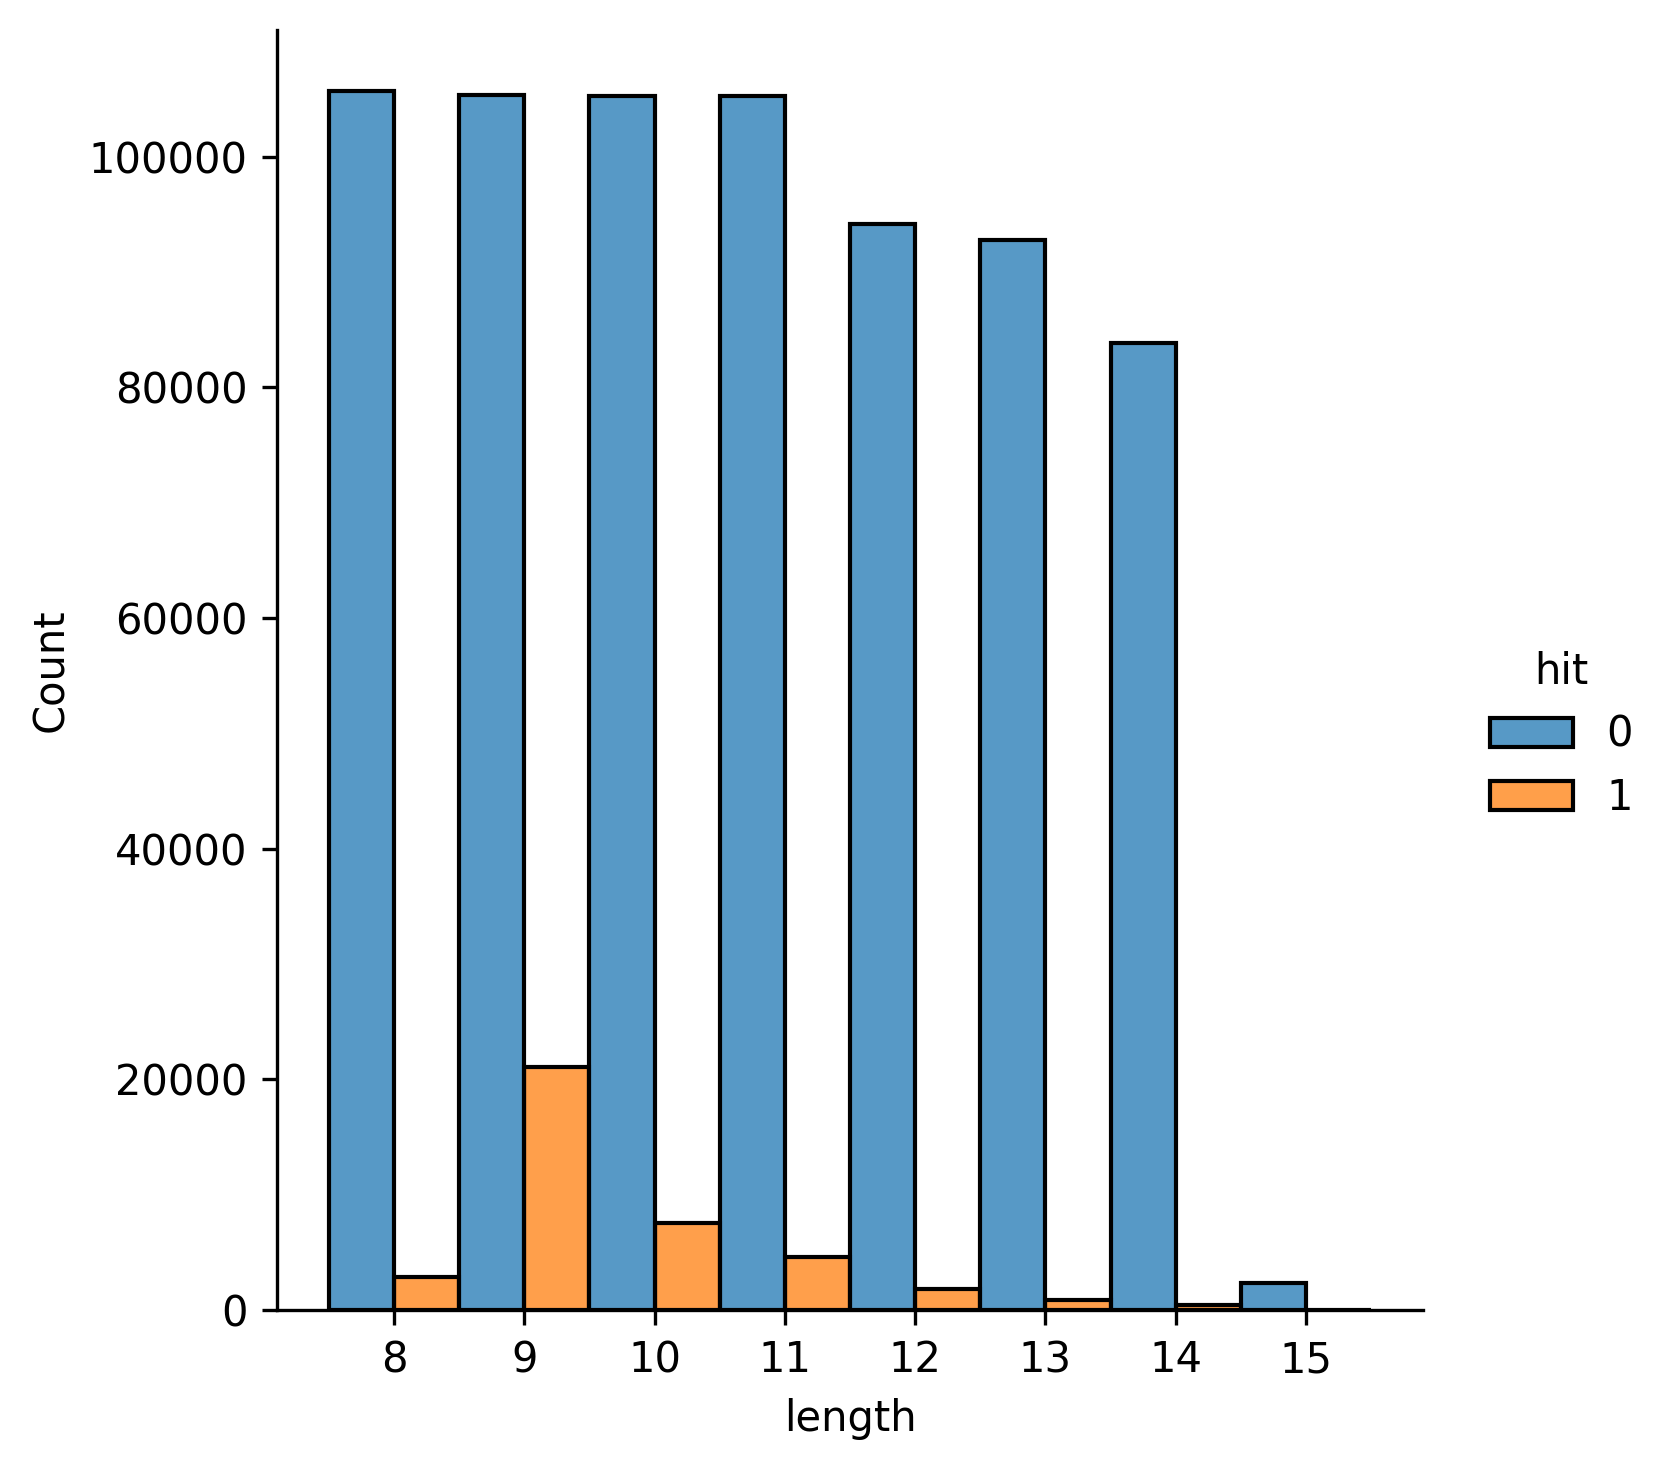

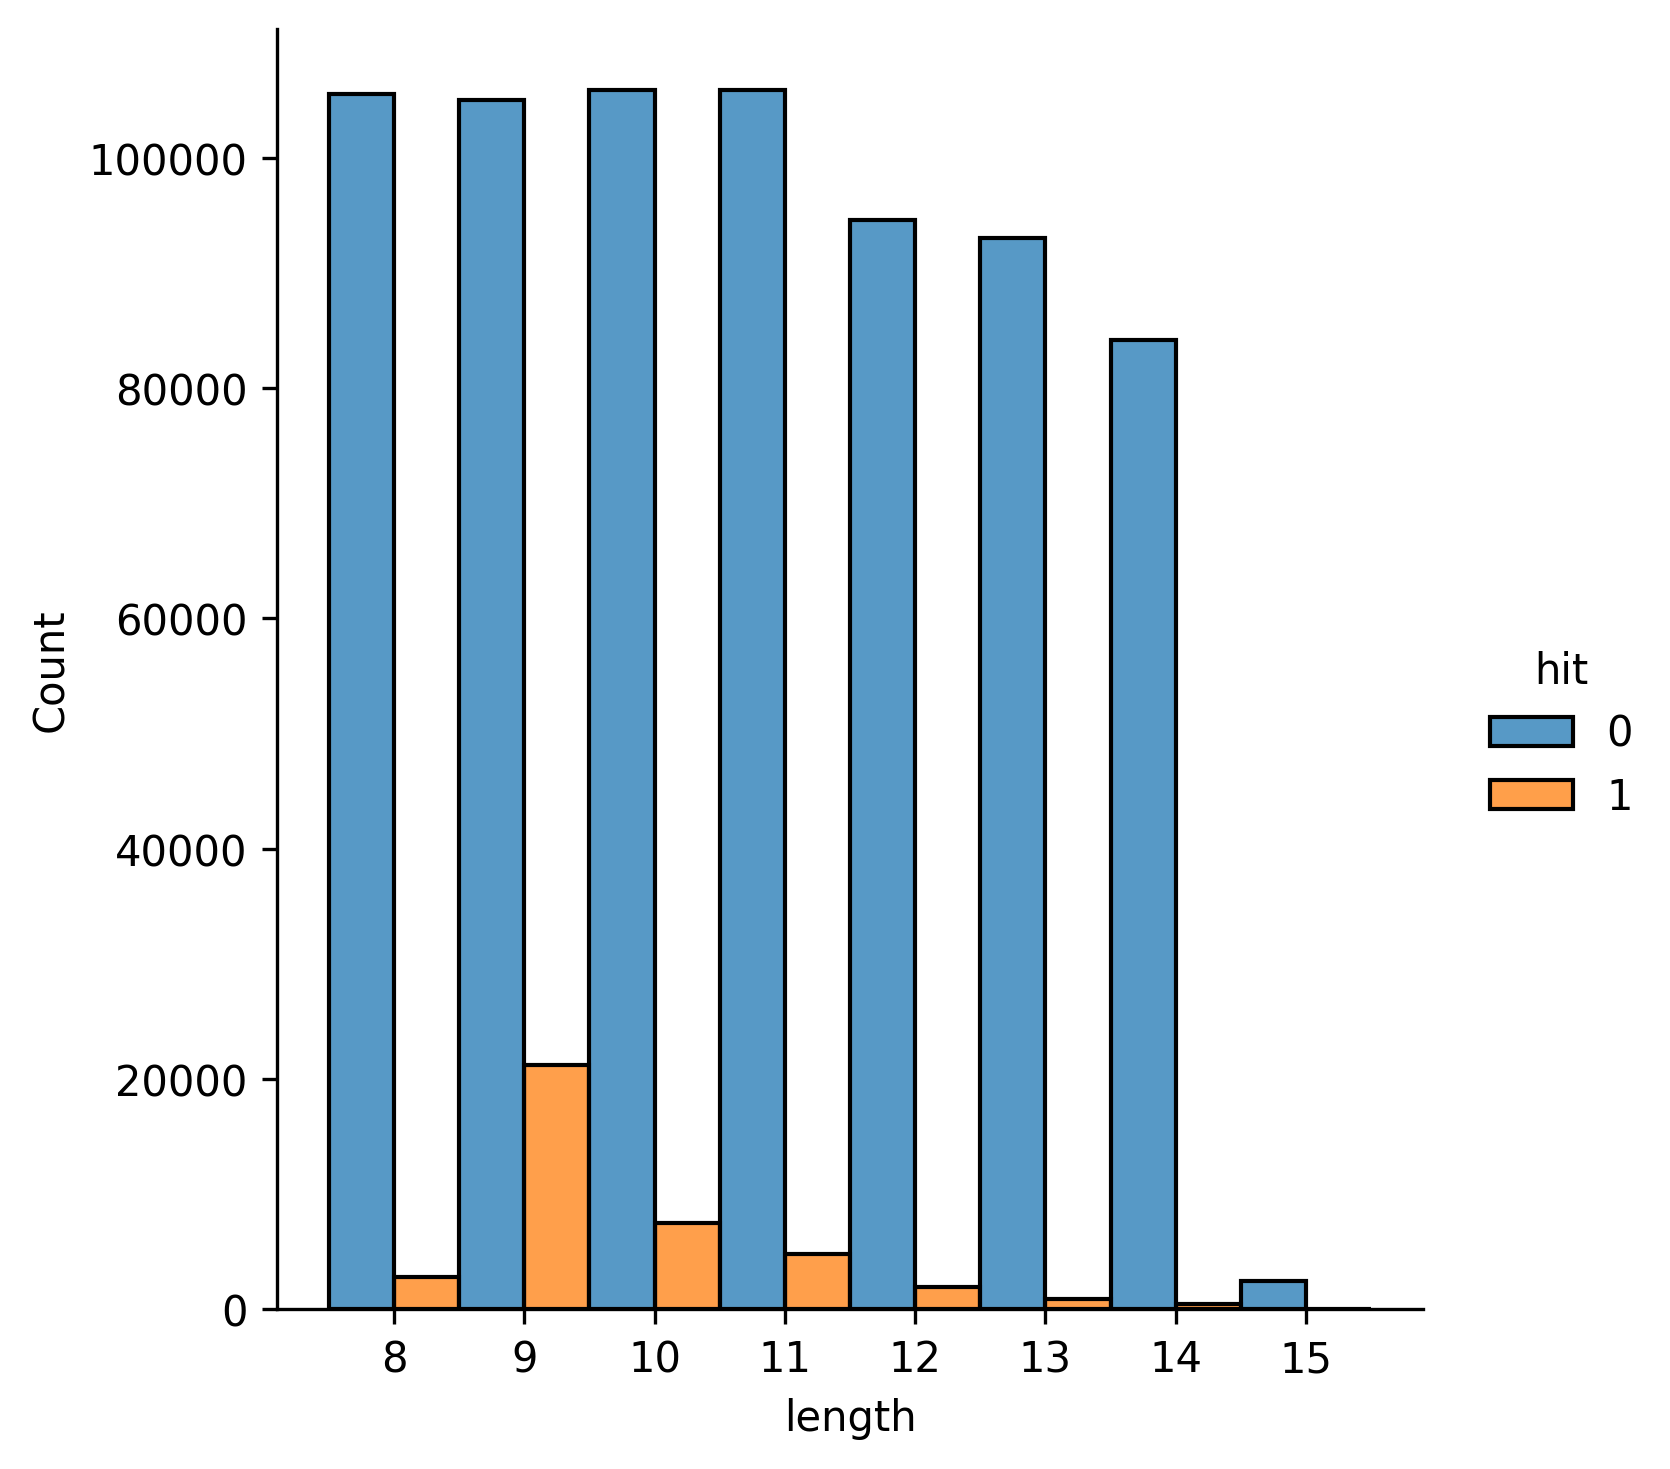

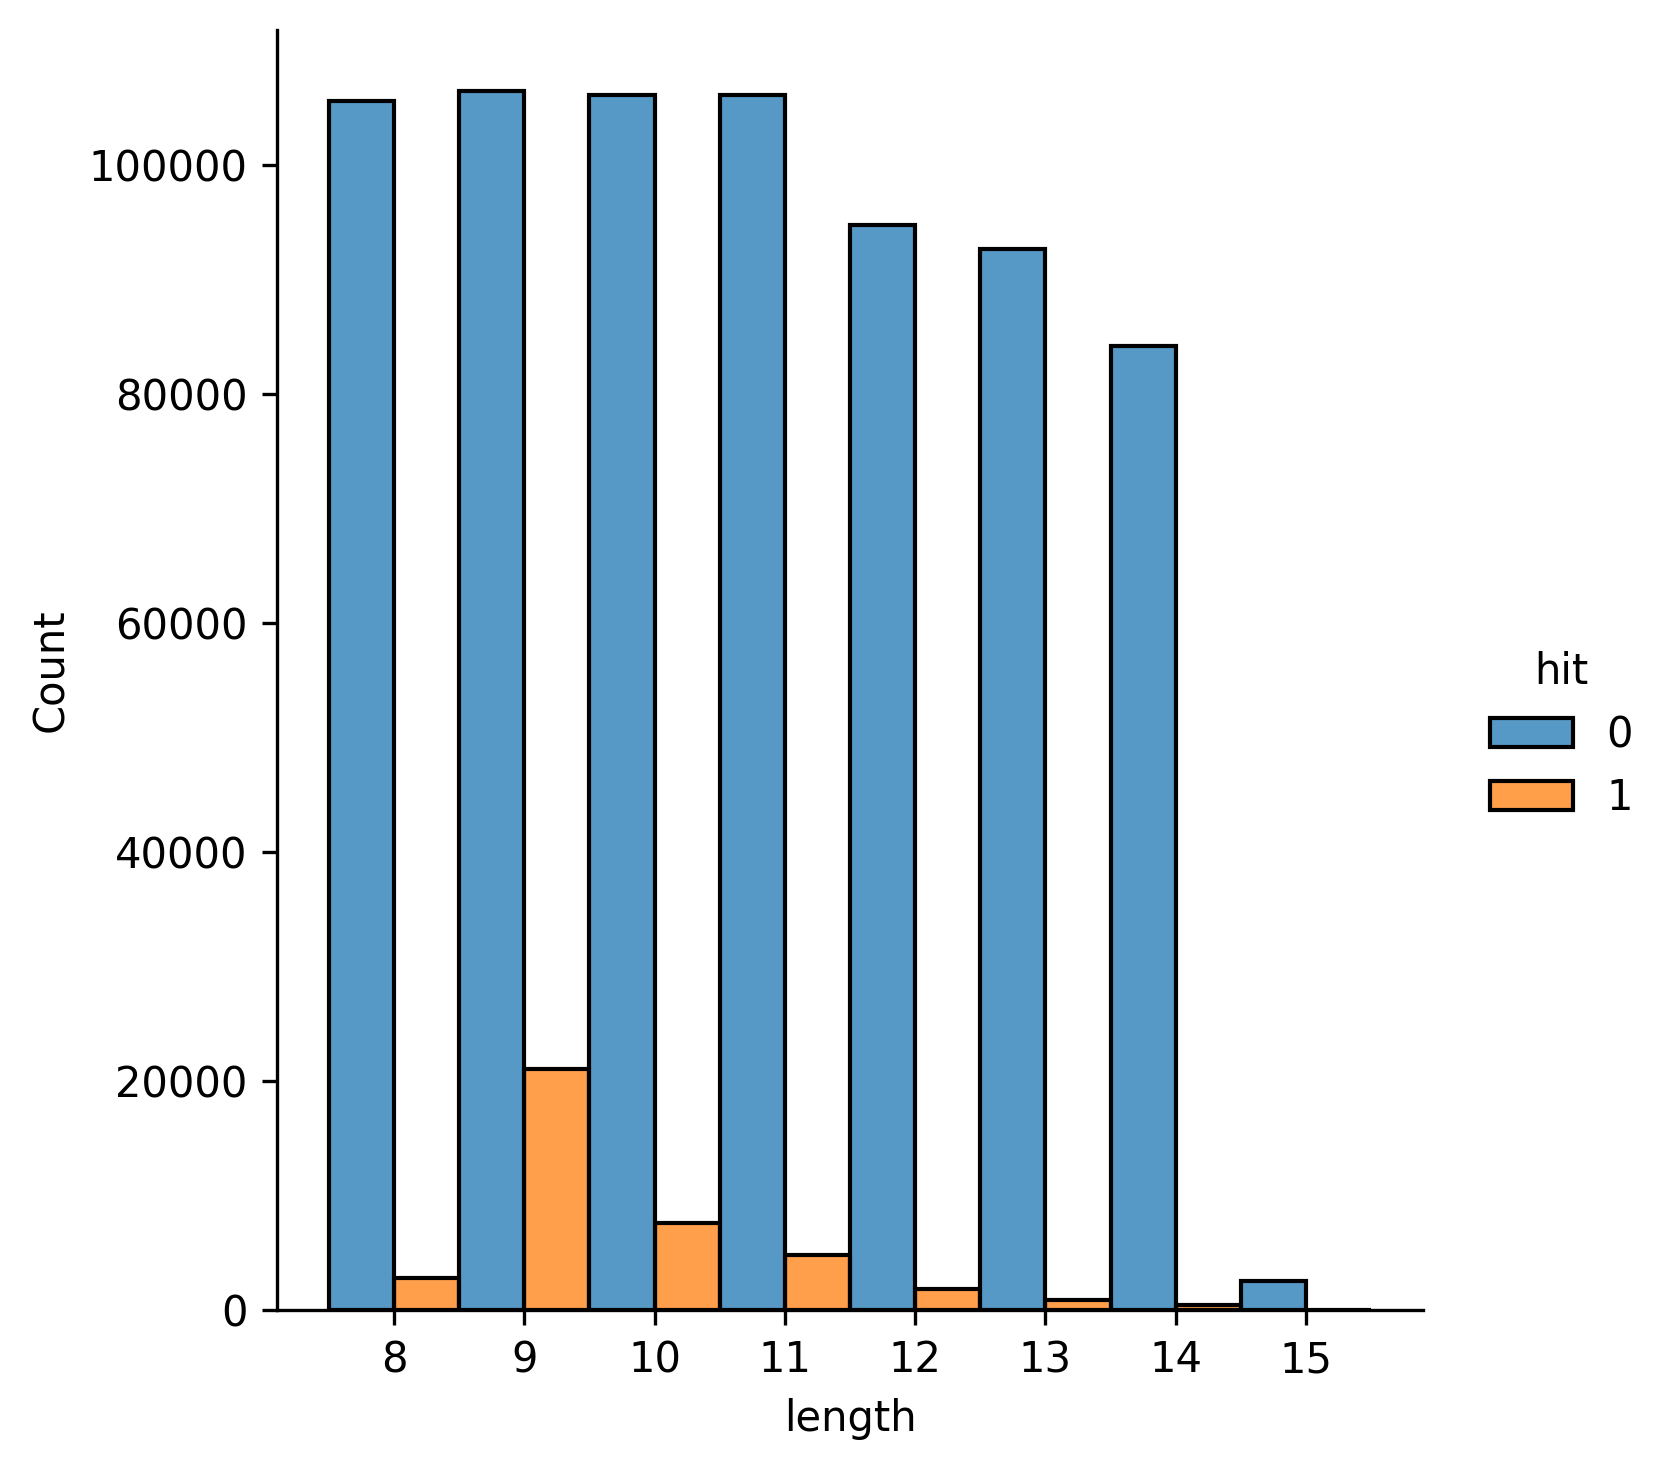

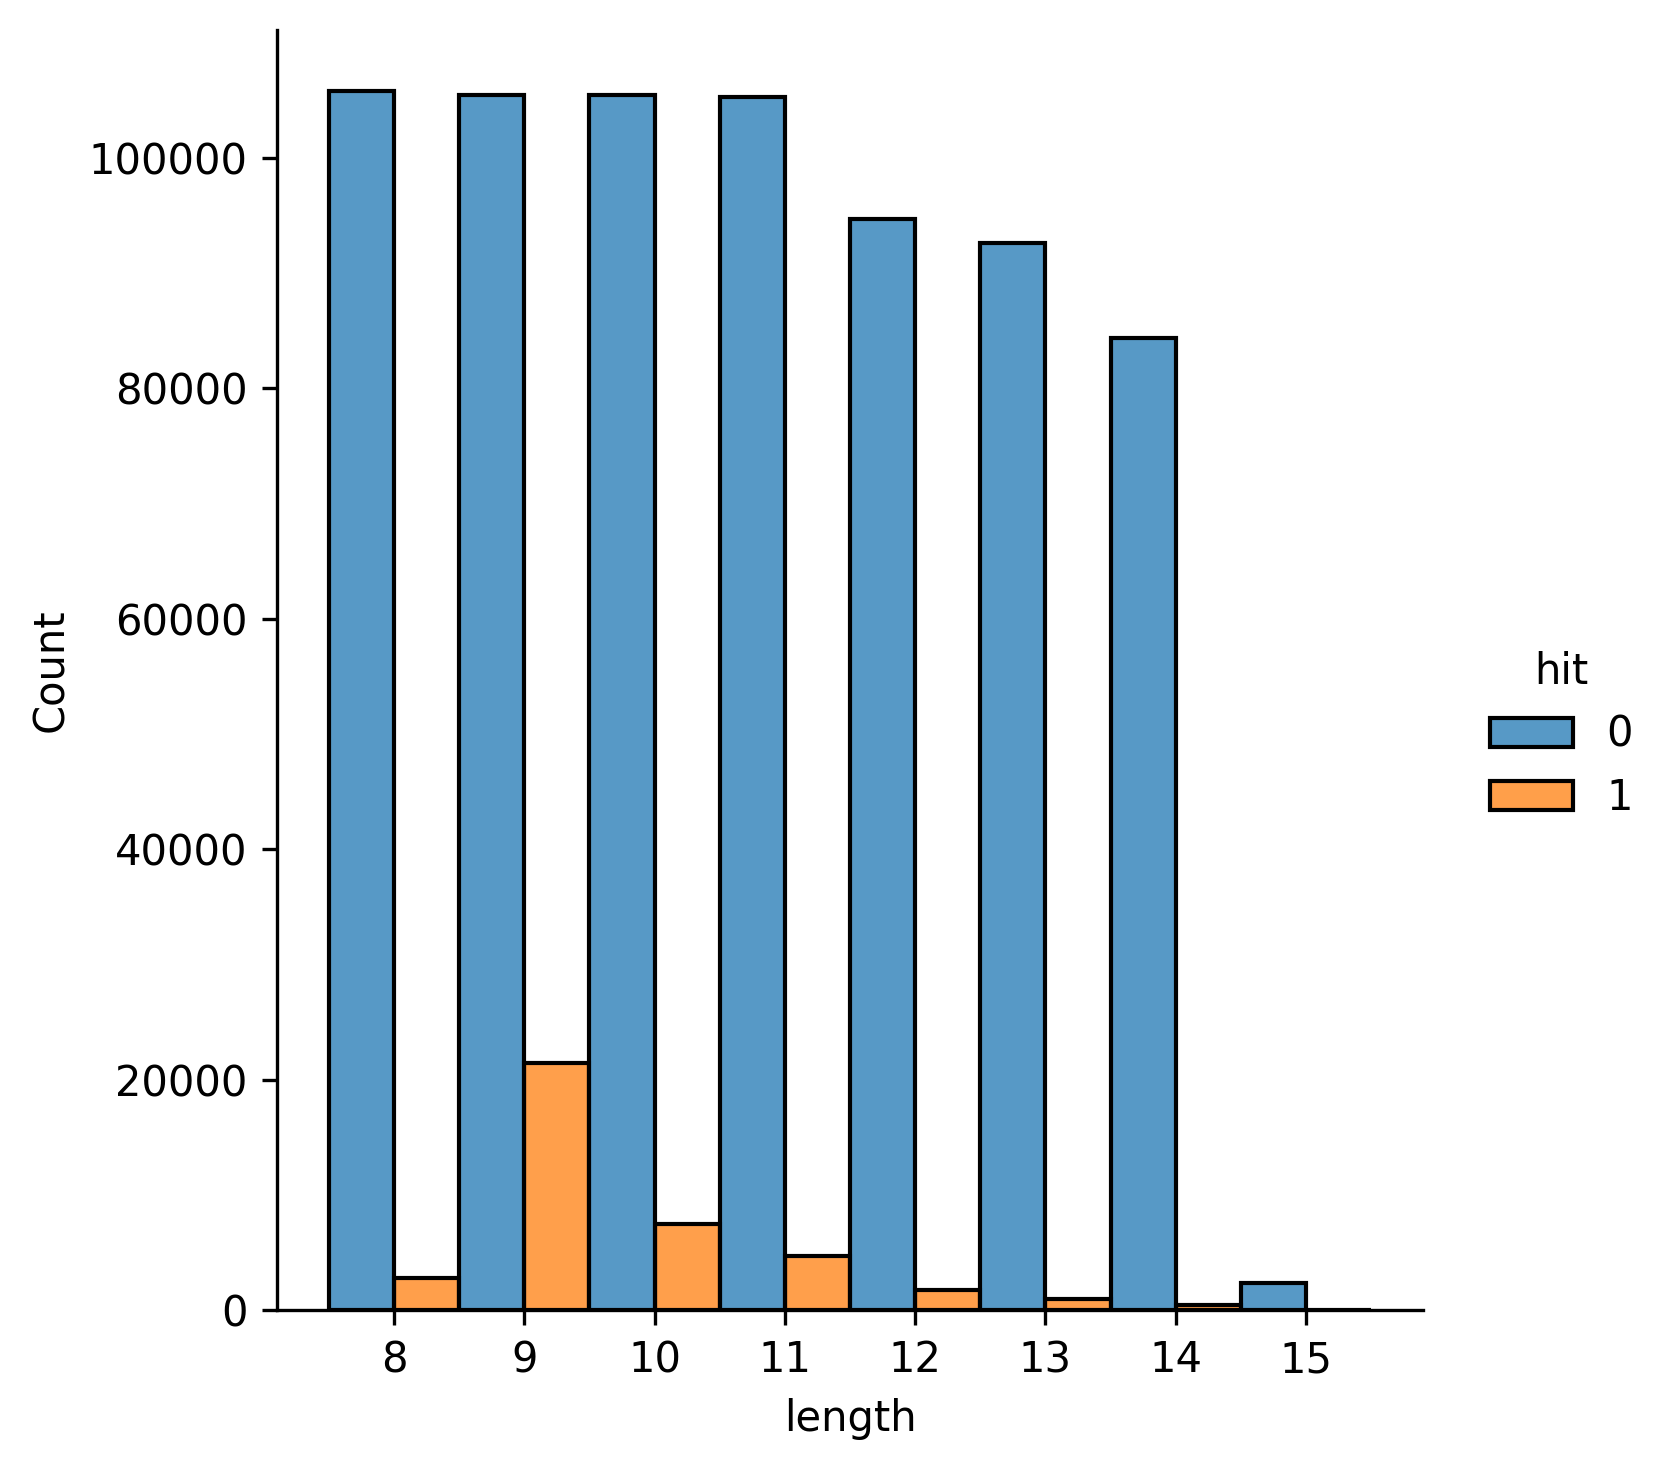

In [12]:
#sns.displot(fold_4["length"],discrete=True)
sns.displot(fold_0, x="length", hue="hit", multiple="dodge",discrete=True)
sns.displot(fold_1, x="length", hue="hit", multiple="dodge",discrete=True)
sns.displot(fold_2, x="length", hue="hit", multiple="dodge",discrete=True)
sns.displot(fold_3, x="length", hue="hit", multiple="dodge",discrete=True)
sns.displot(fold_4, x="length", hue="hit", multiple="dodge",discrete=True)

In [13]:
def visualize_length(data,cutoff):
    df_0 = data[data['hit'] == 0]
    df_1 = data[data['hit'] == 1]
    data_matrix_0 = pd.crosstab(df_0["allele"],df_0["length"])
    data_matrix_1 = pd.crosstab(df_1["allele"],df_1["length"])
    plt.subplots_adjust(hspace = 5)    
    fig,ax = plt.subplots(1,2)
    sns.heatmap(data_matrix_0 > cutoff,cmap="Greys",ax=ax[0],cbar=False)
    sns.heatmap(data_matrix_1 > cutoff,cmap="Greys",ax=ax[1],cbar=False)
    fig.tight_layout(pad=5.0)
    plt.show()    

<Figure size 3000x3000 with 0 Axes>

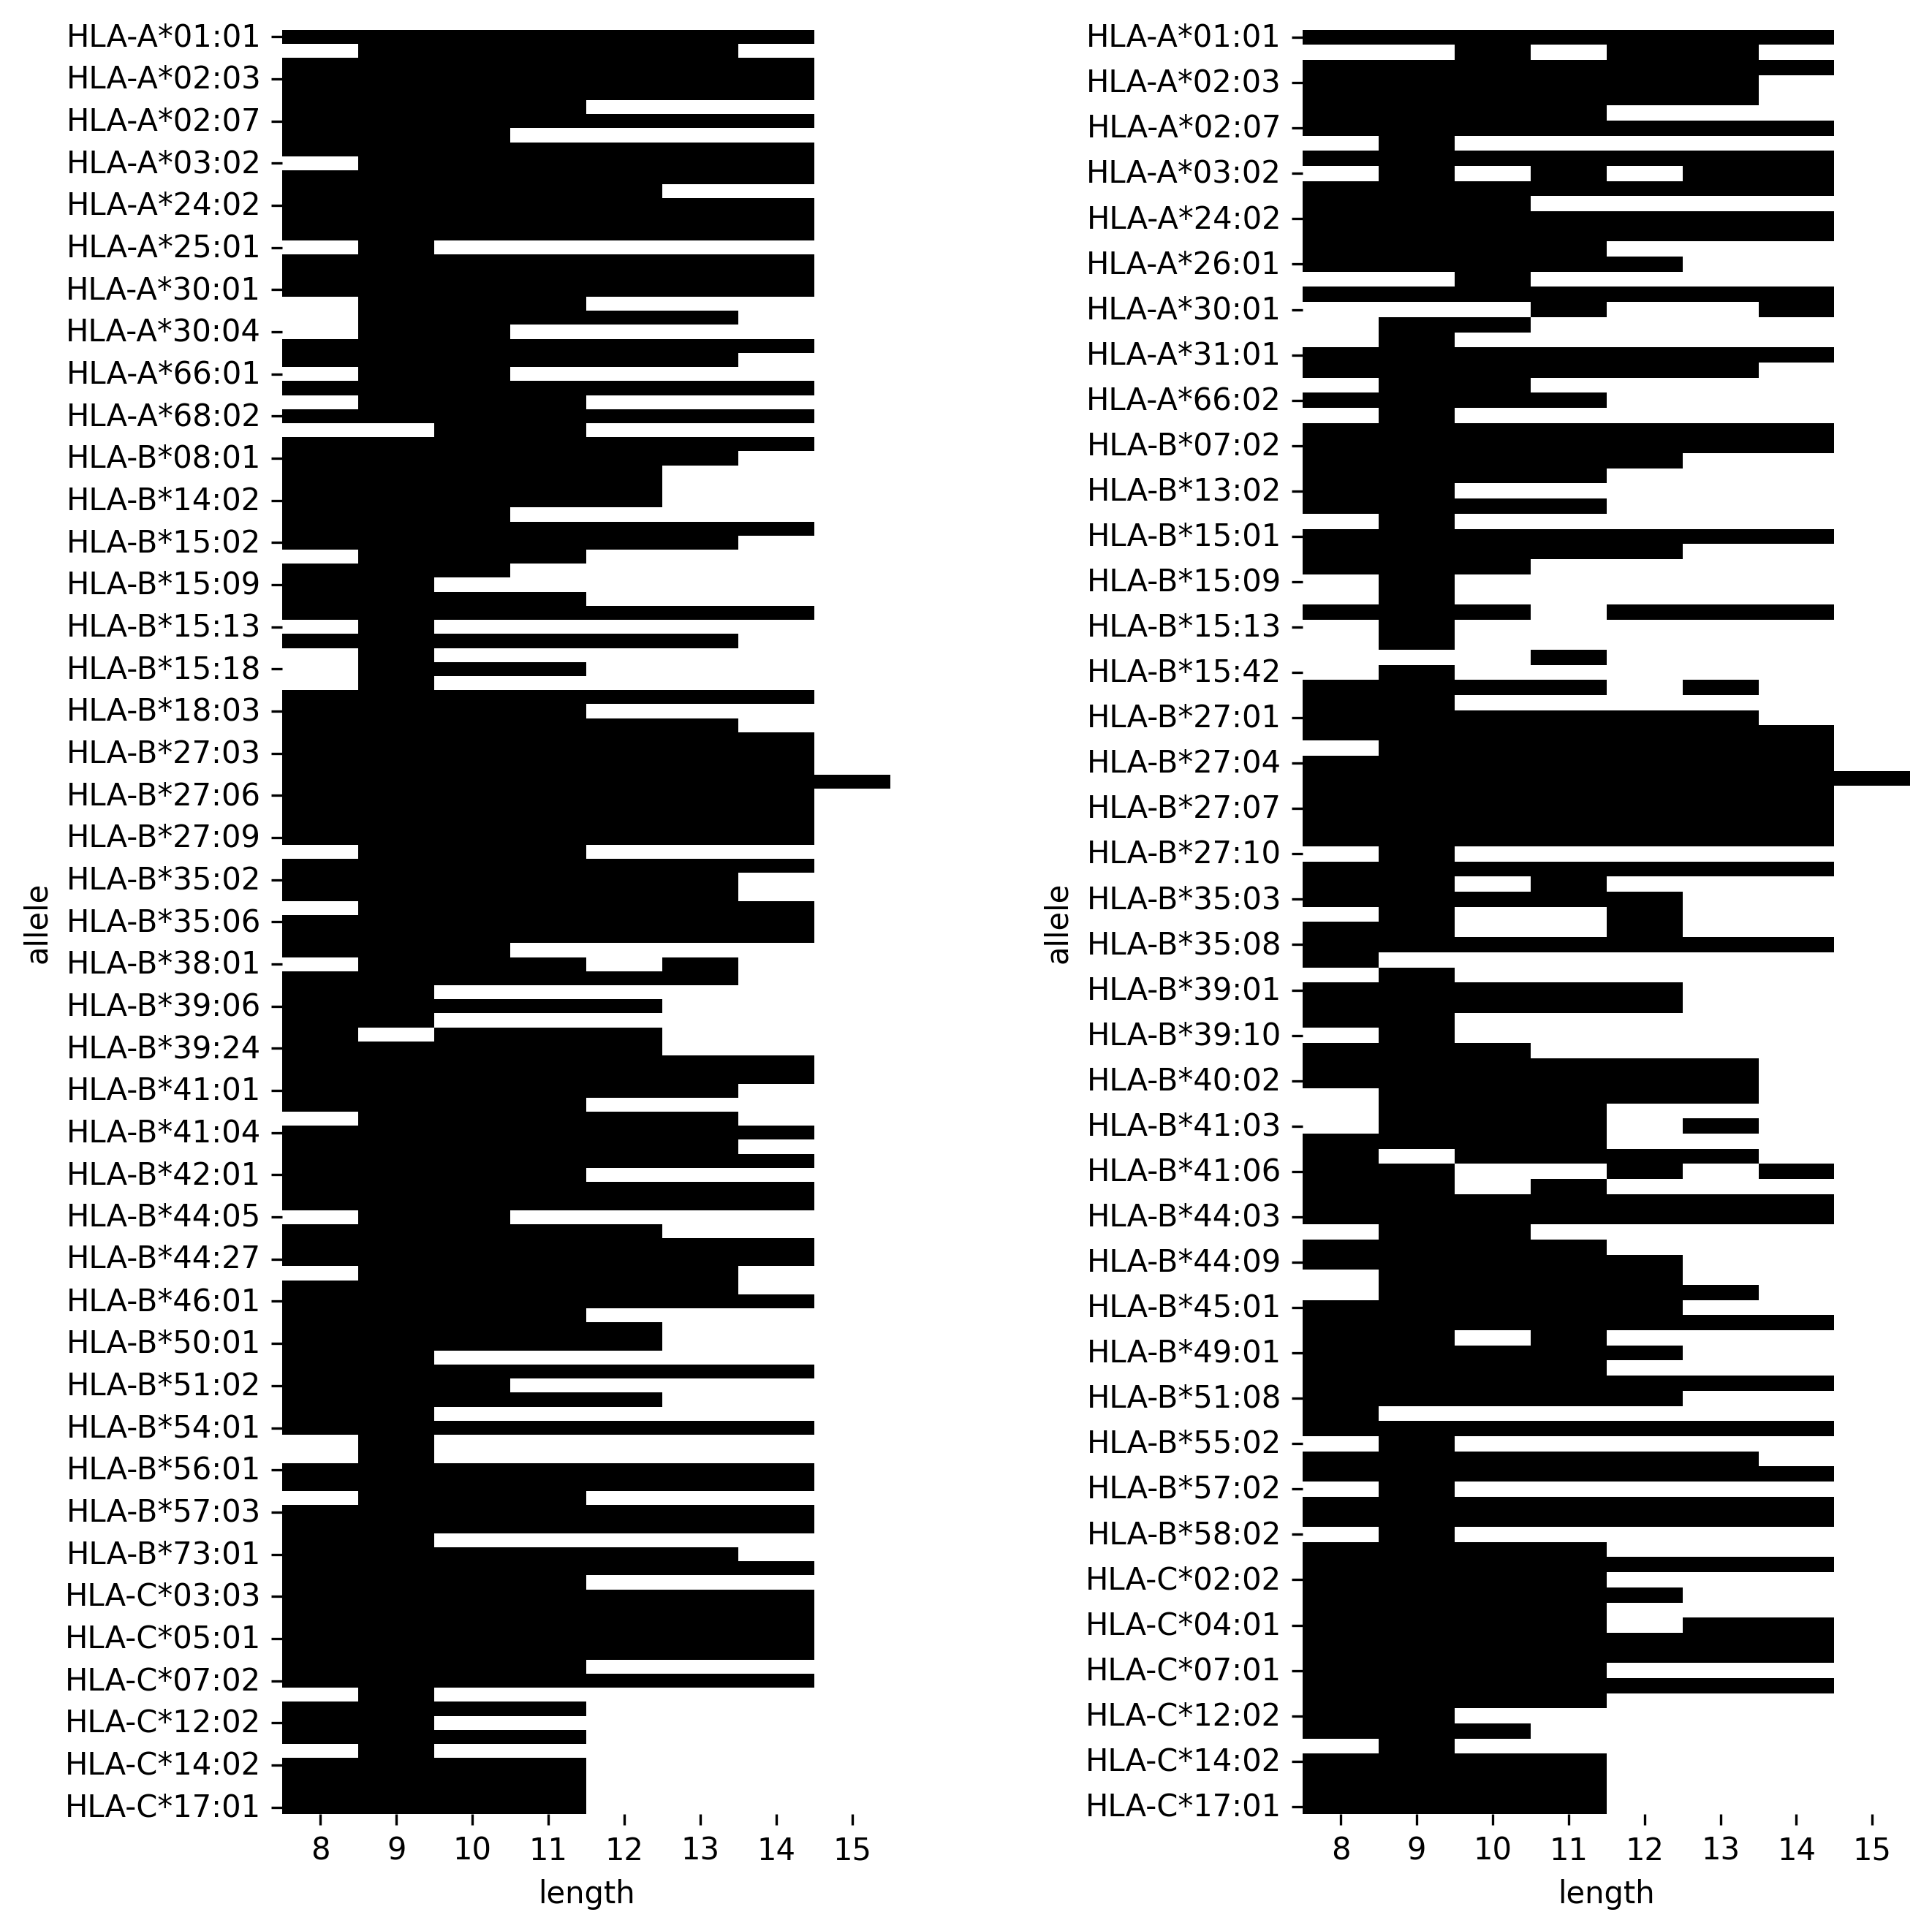

In [14]:
visualize_length(fold_0,0)


<Figure size 3000x3000 with 0 Axes>

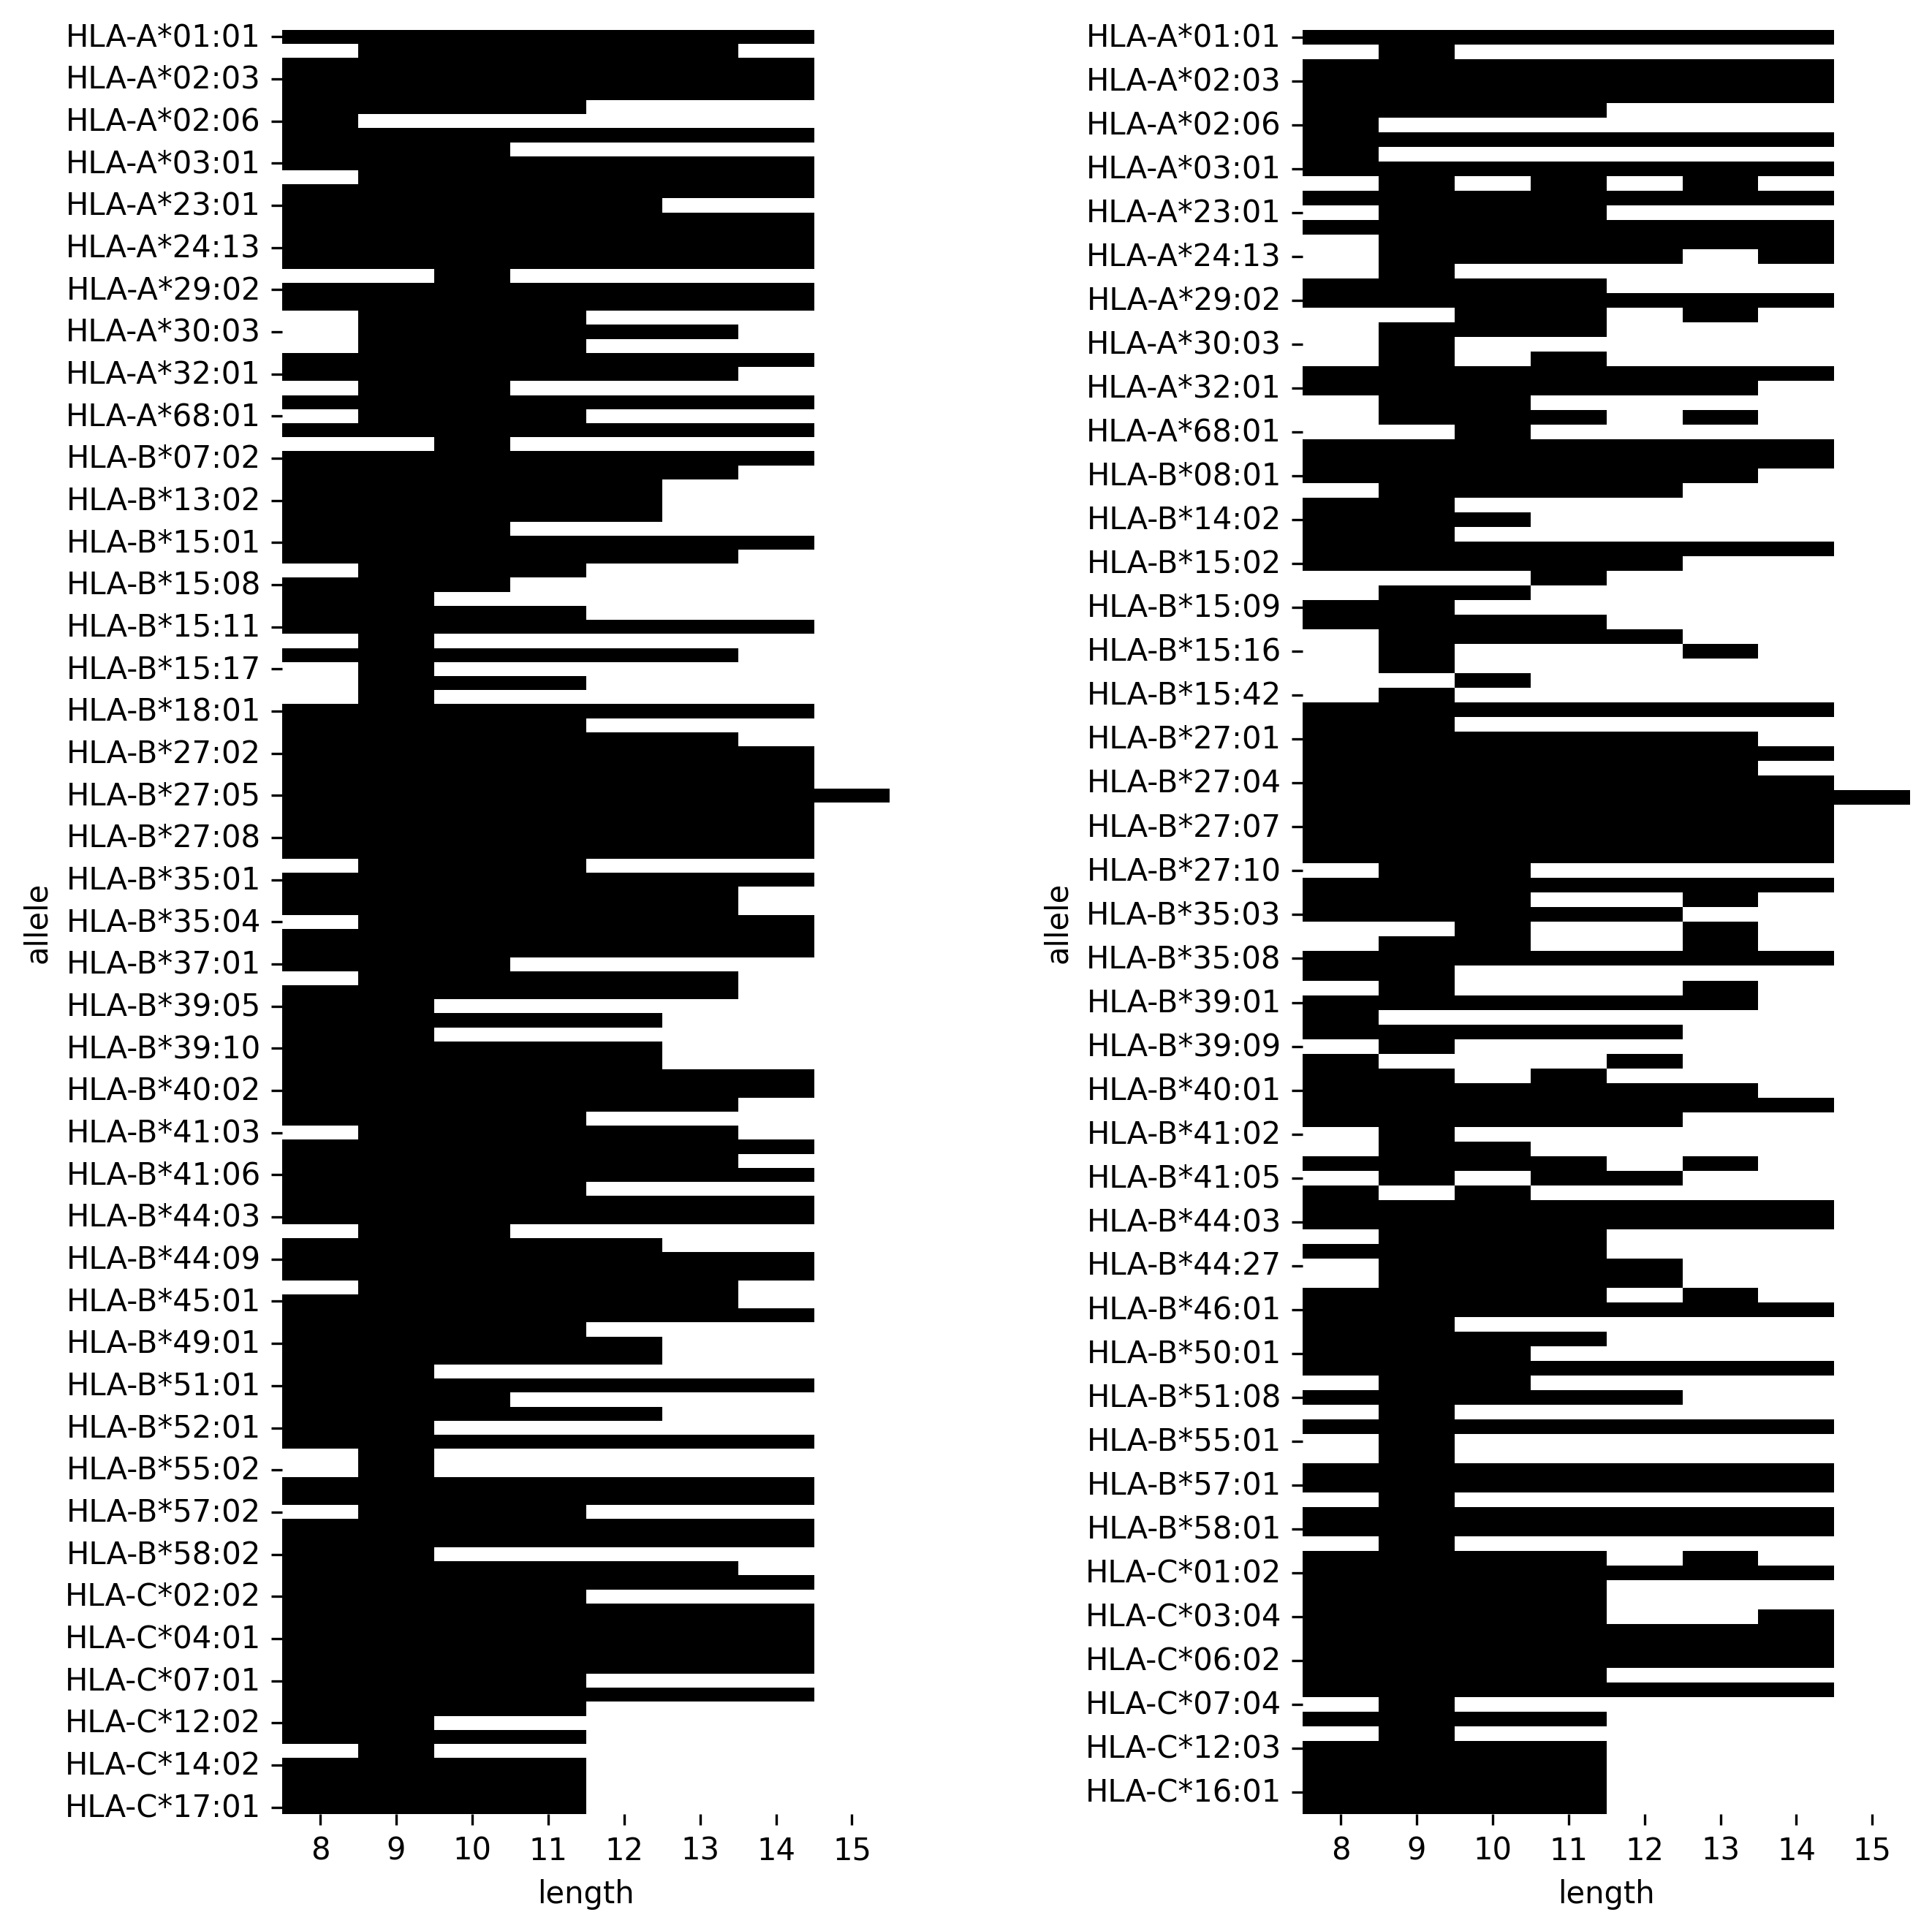

In [15]:
visualize_length(fold_1,0)


<Figure size 3000x3000 with 0 Axes>

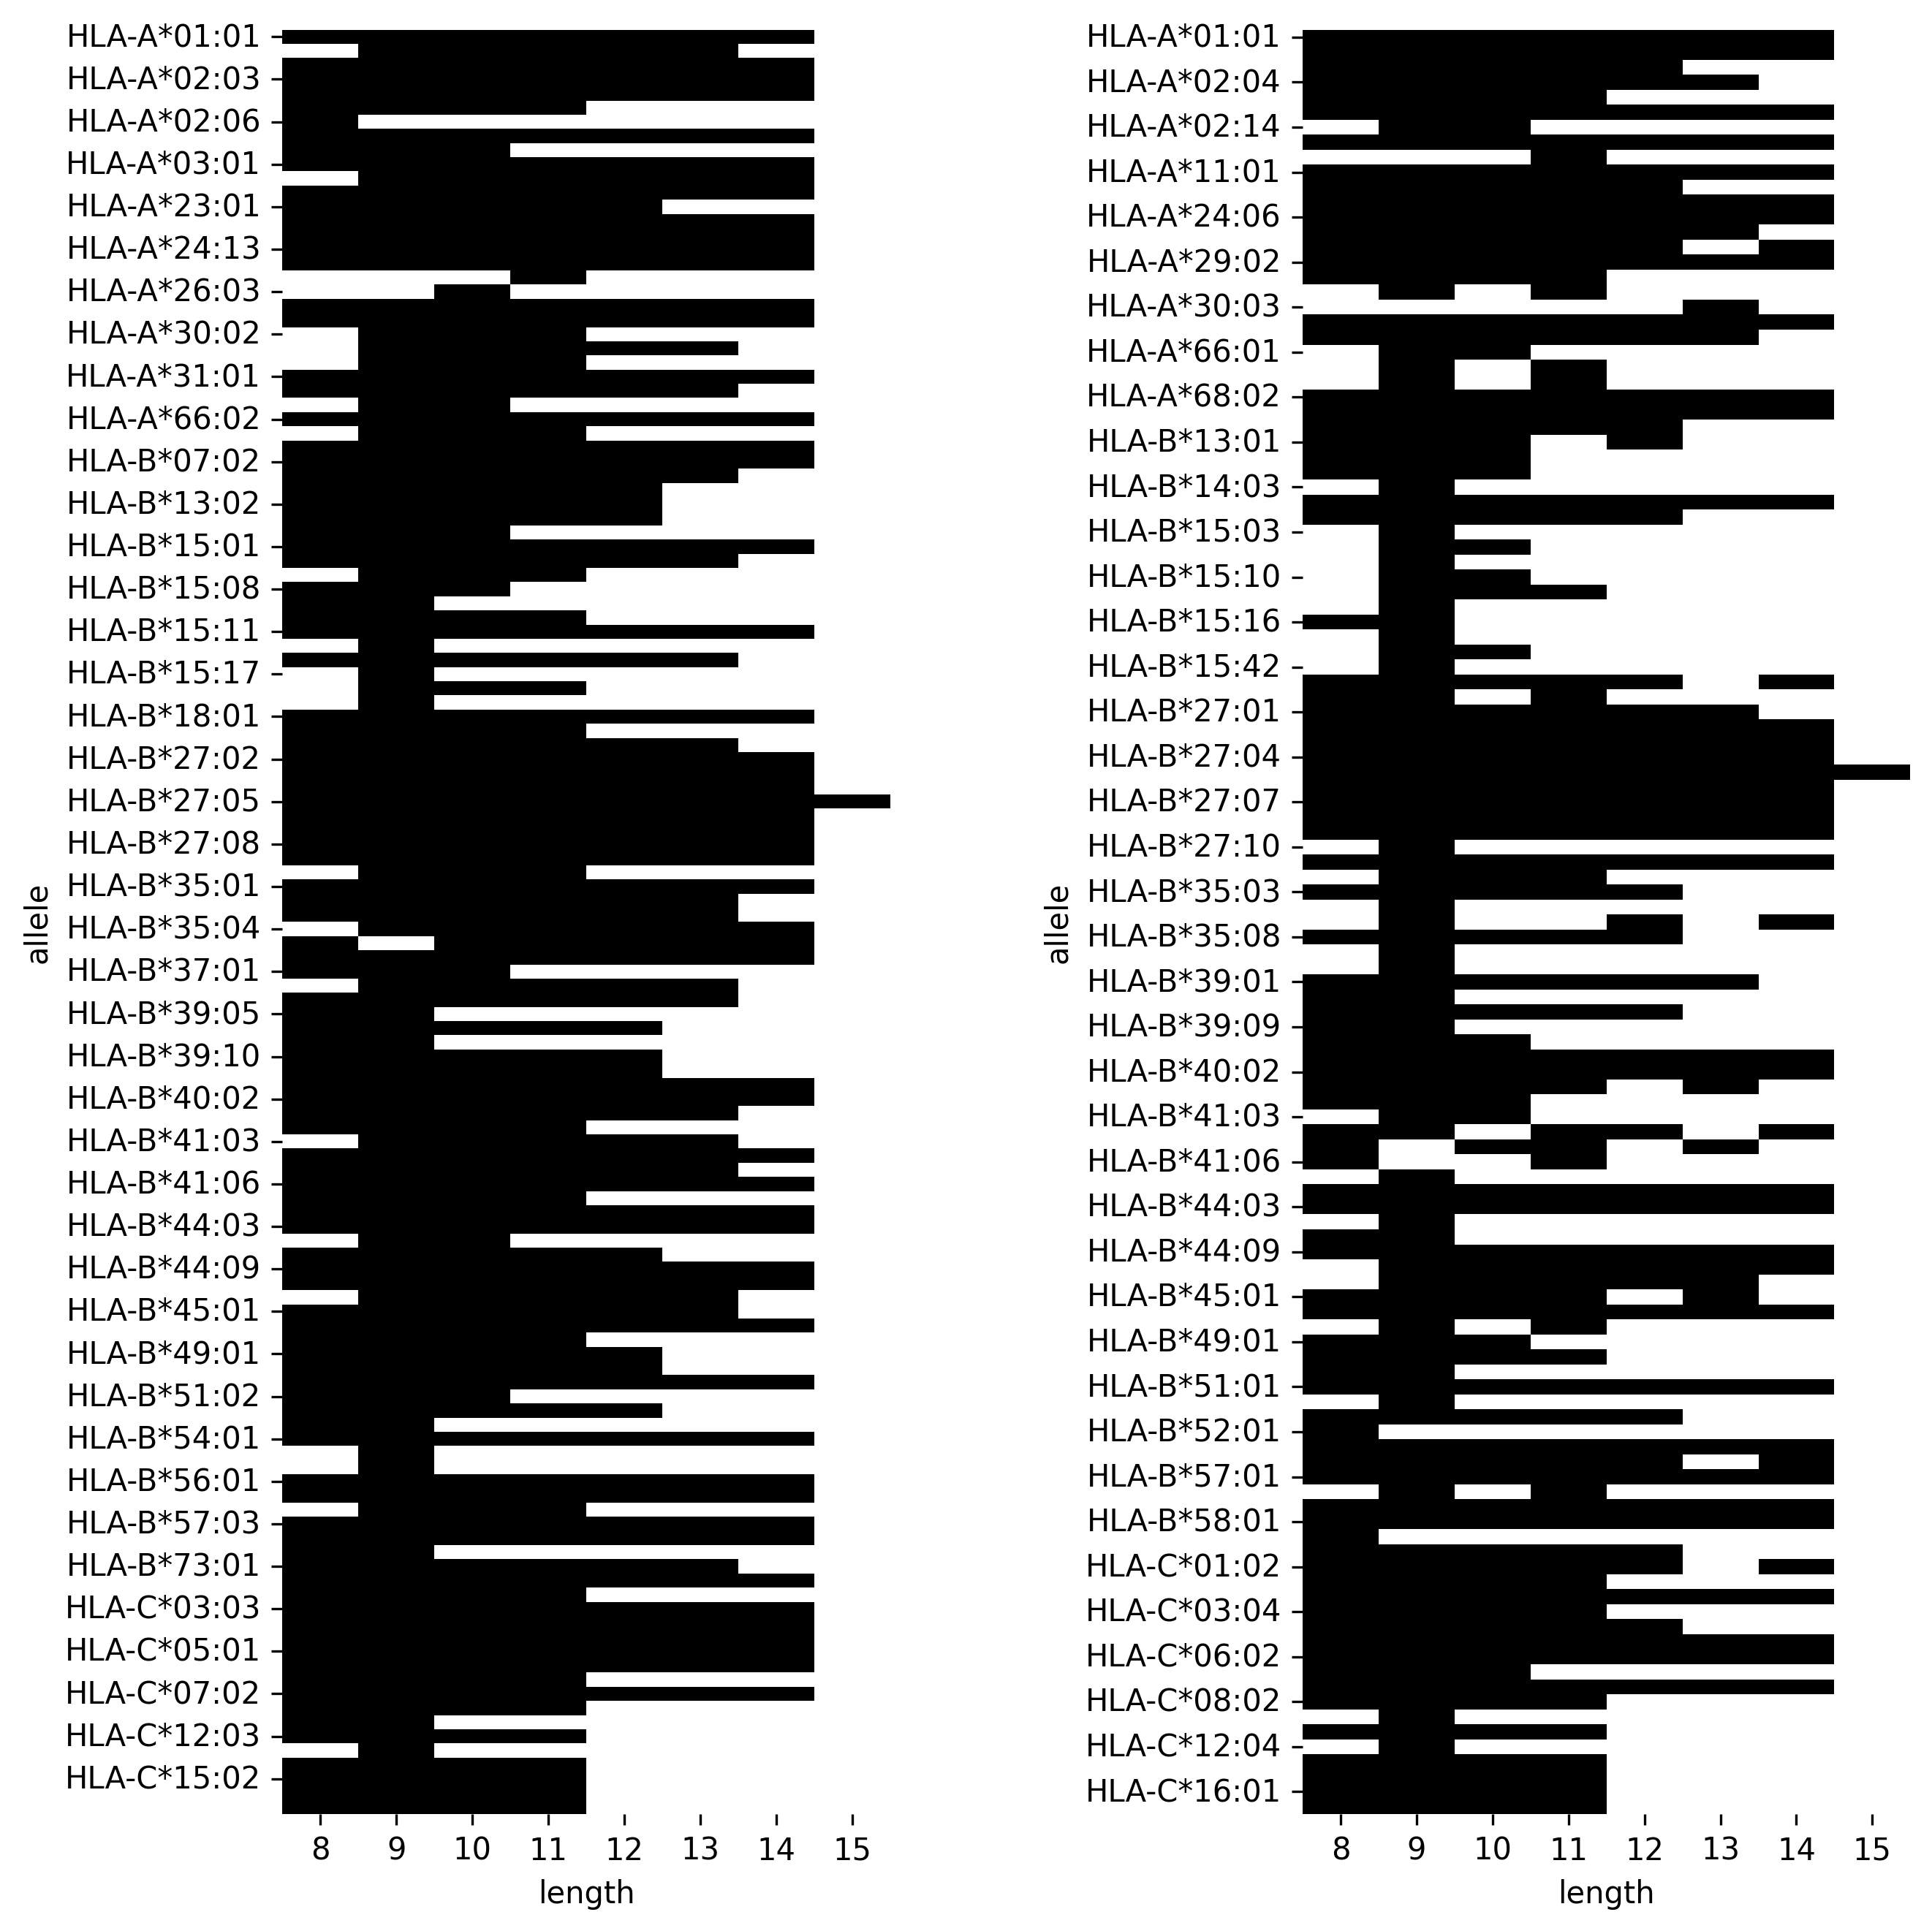

In [16]:
visualize_length(fold_2,0)

<Figure size 3000x3000 with 0 Axes>

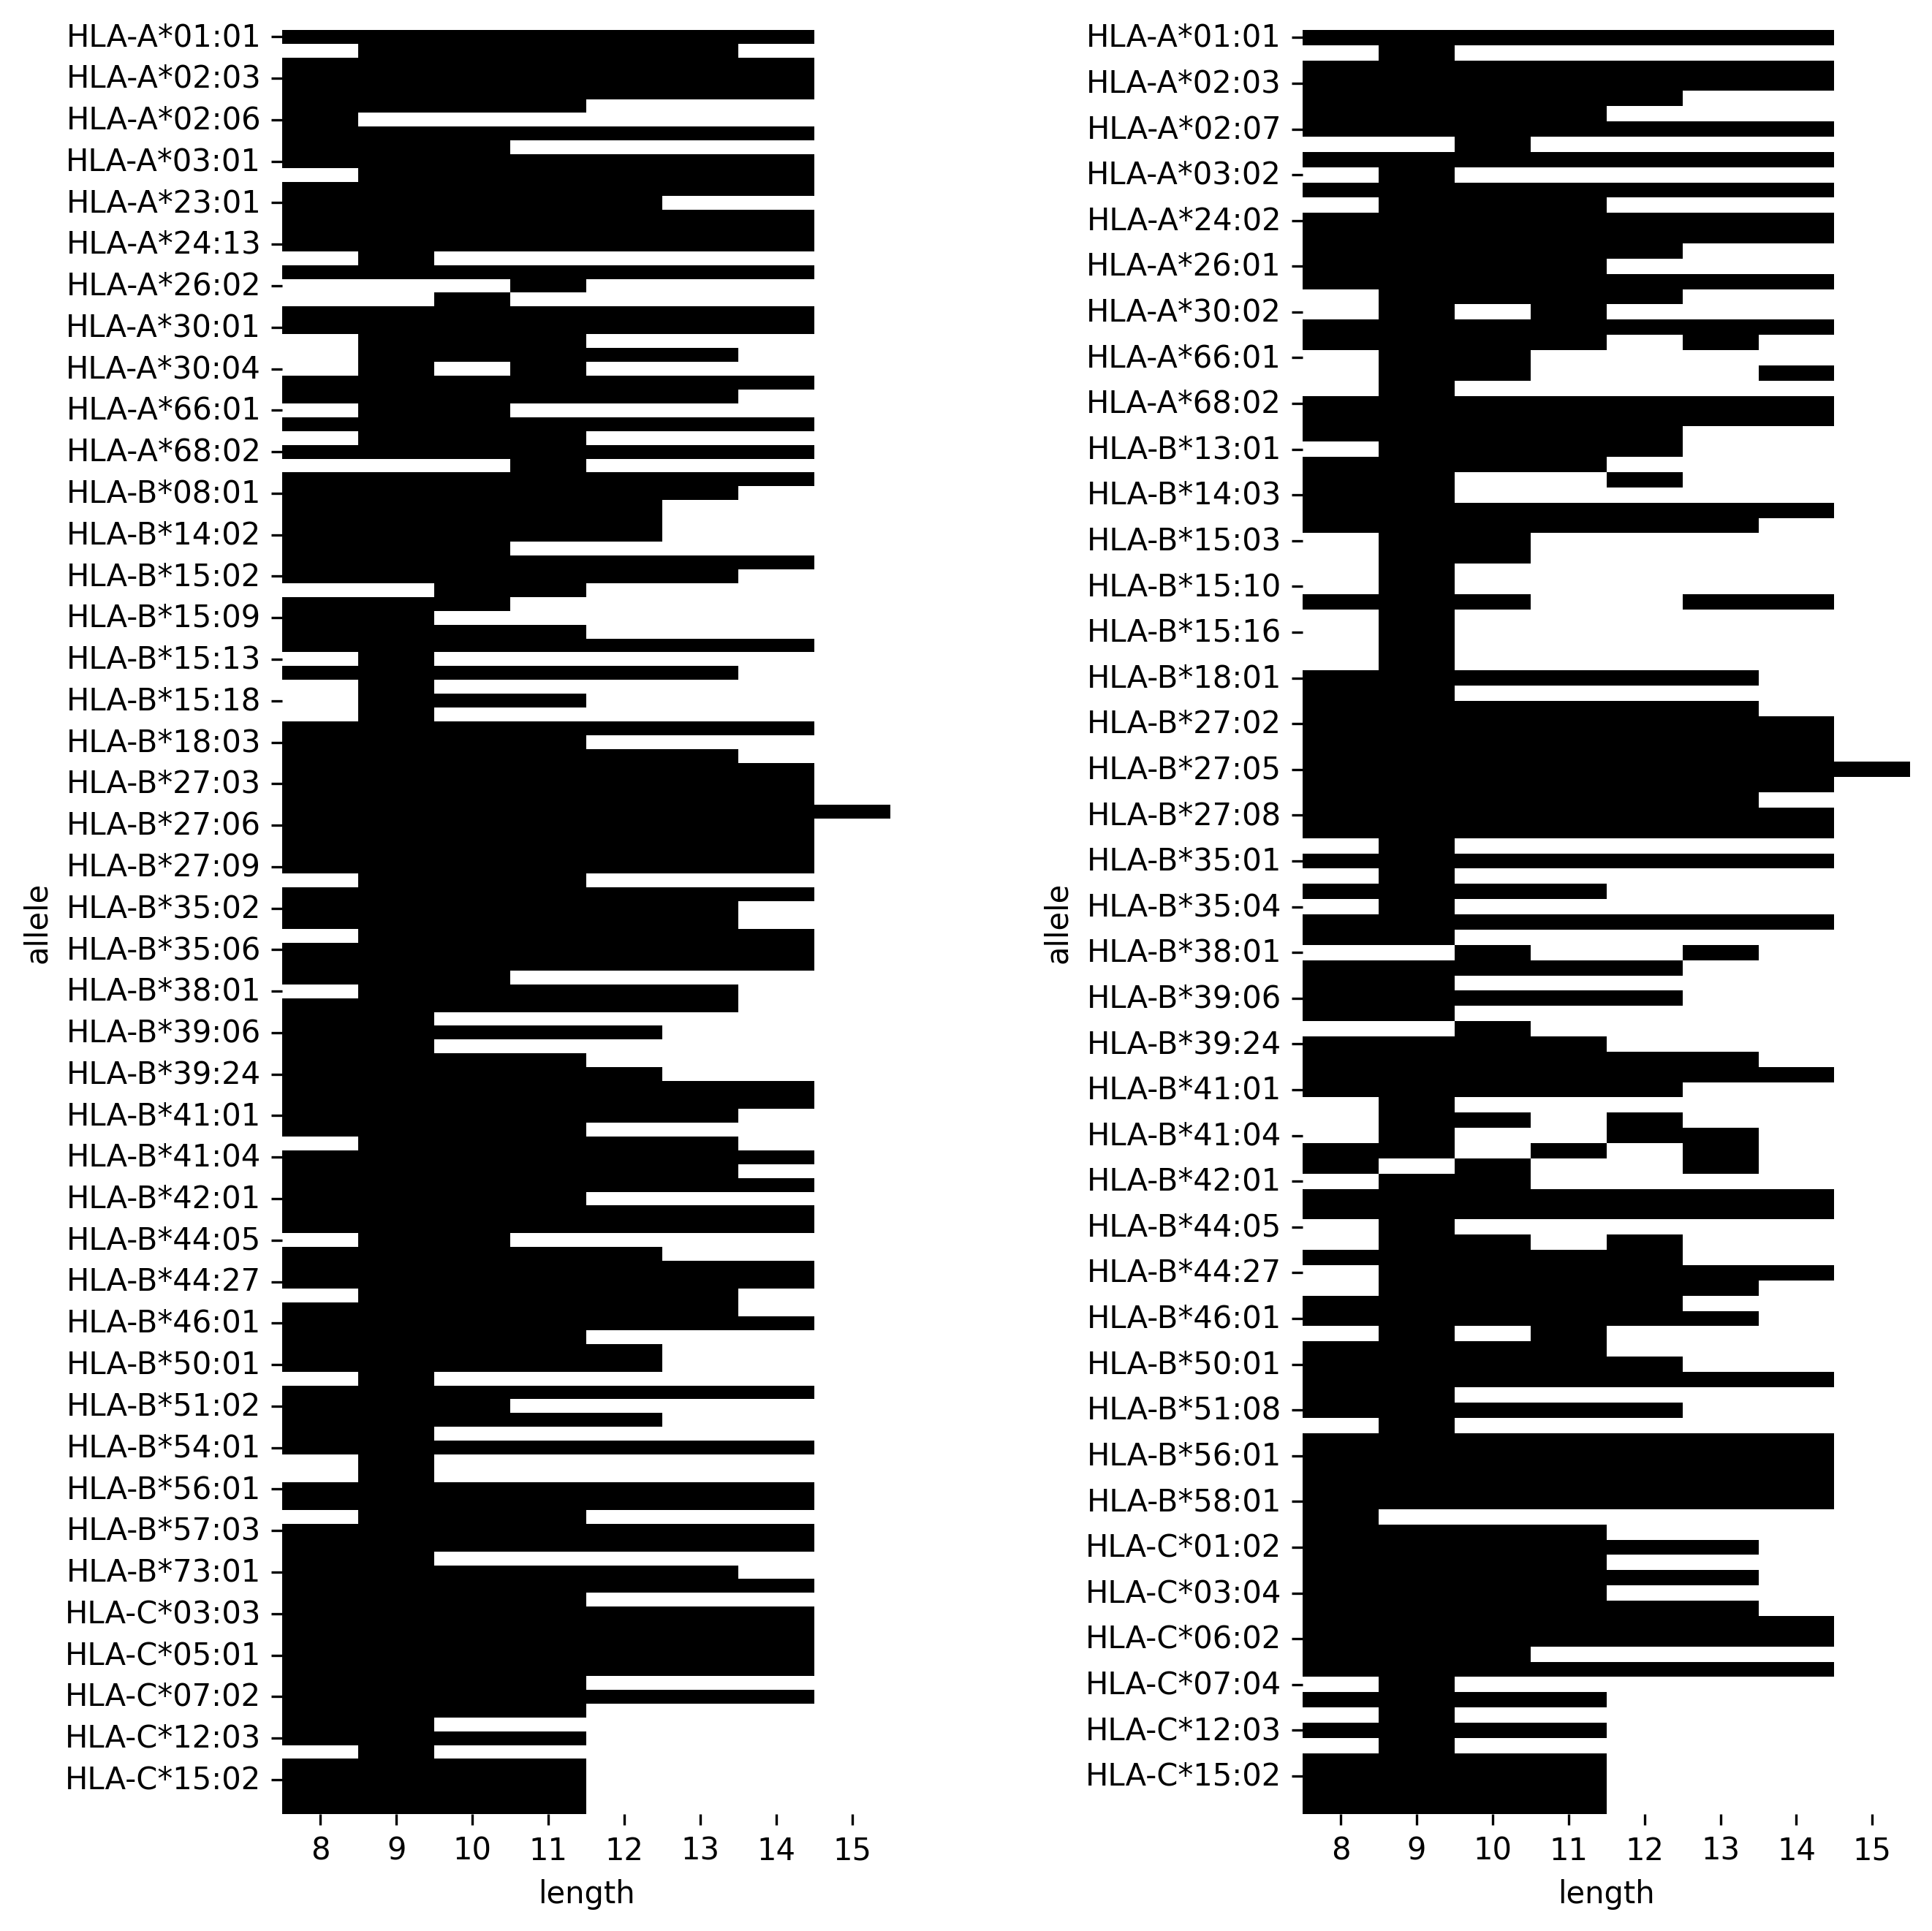

In [17]:
visualize_length(fold_3,0)

<Figure size 3000x3000 with 0 Axes>

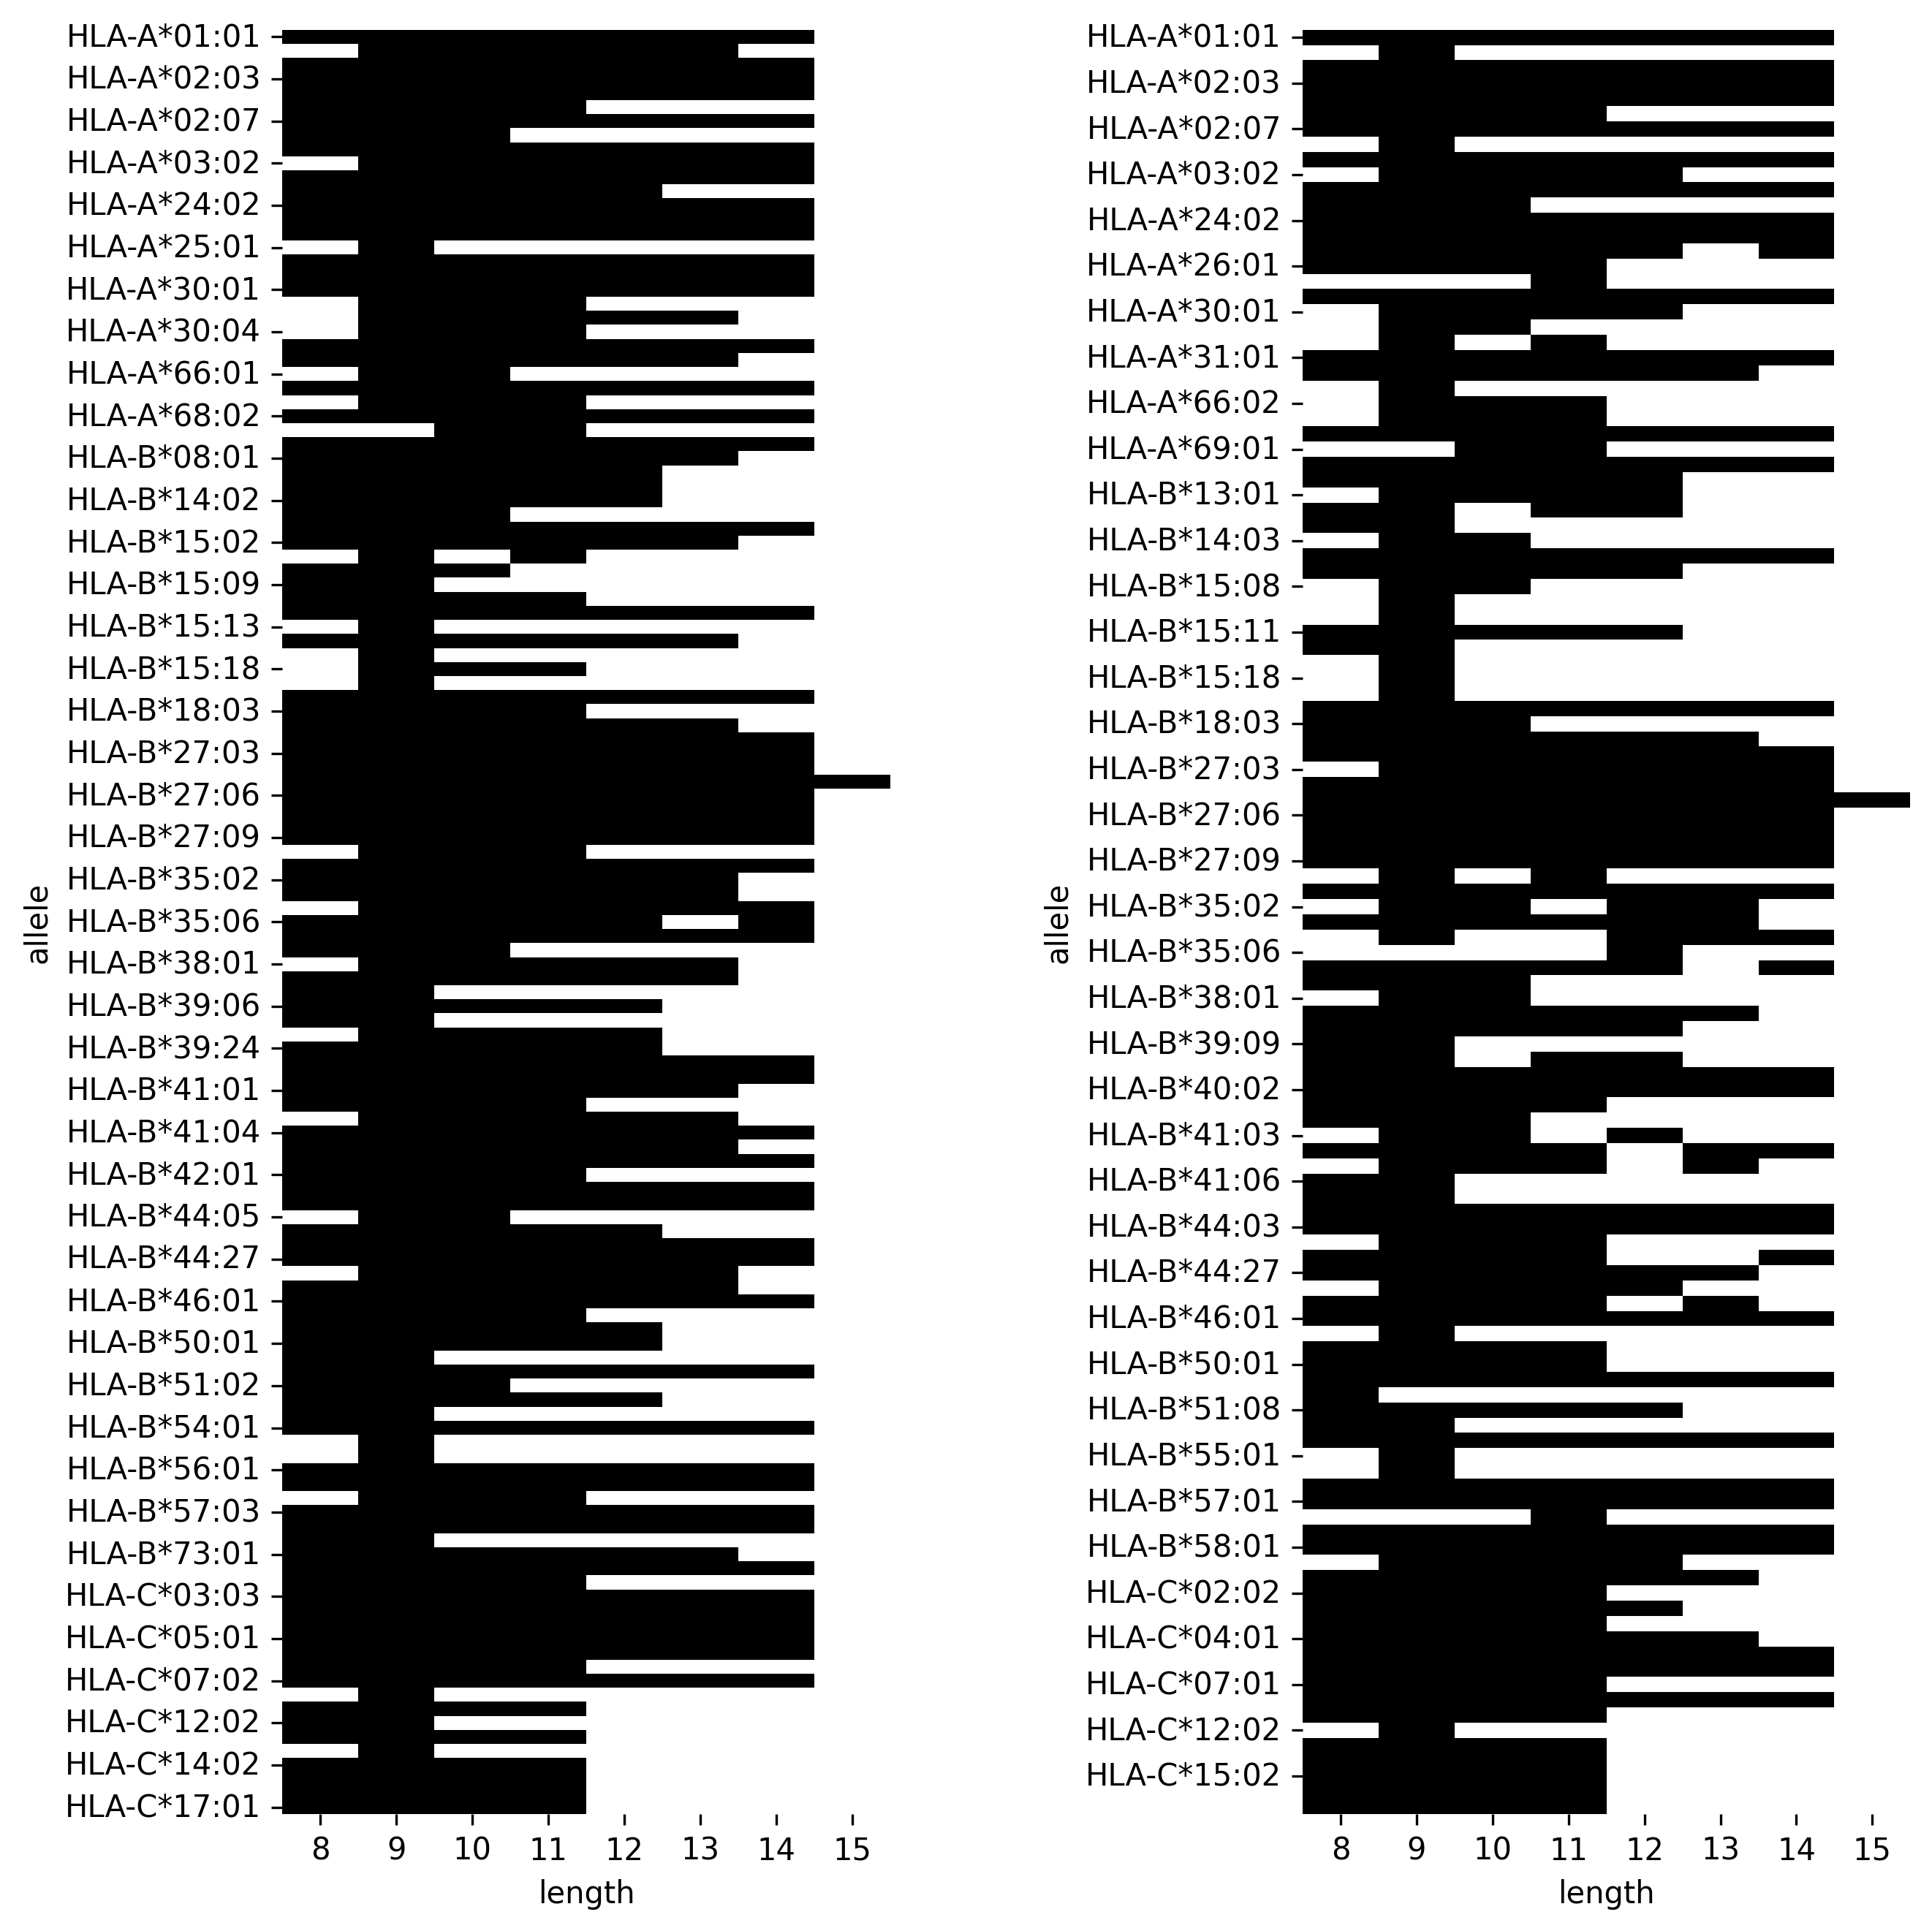

In [18]:
visualize_length(fold_4,0)

<Figure size 3000x3000 with 0 Axes>

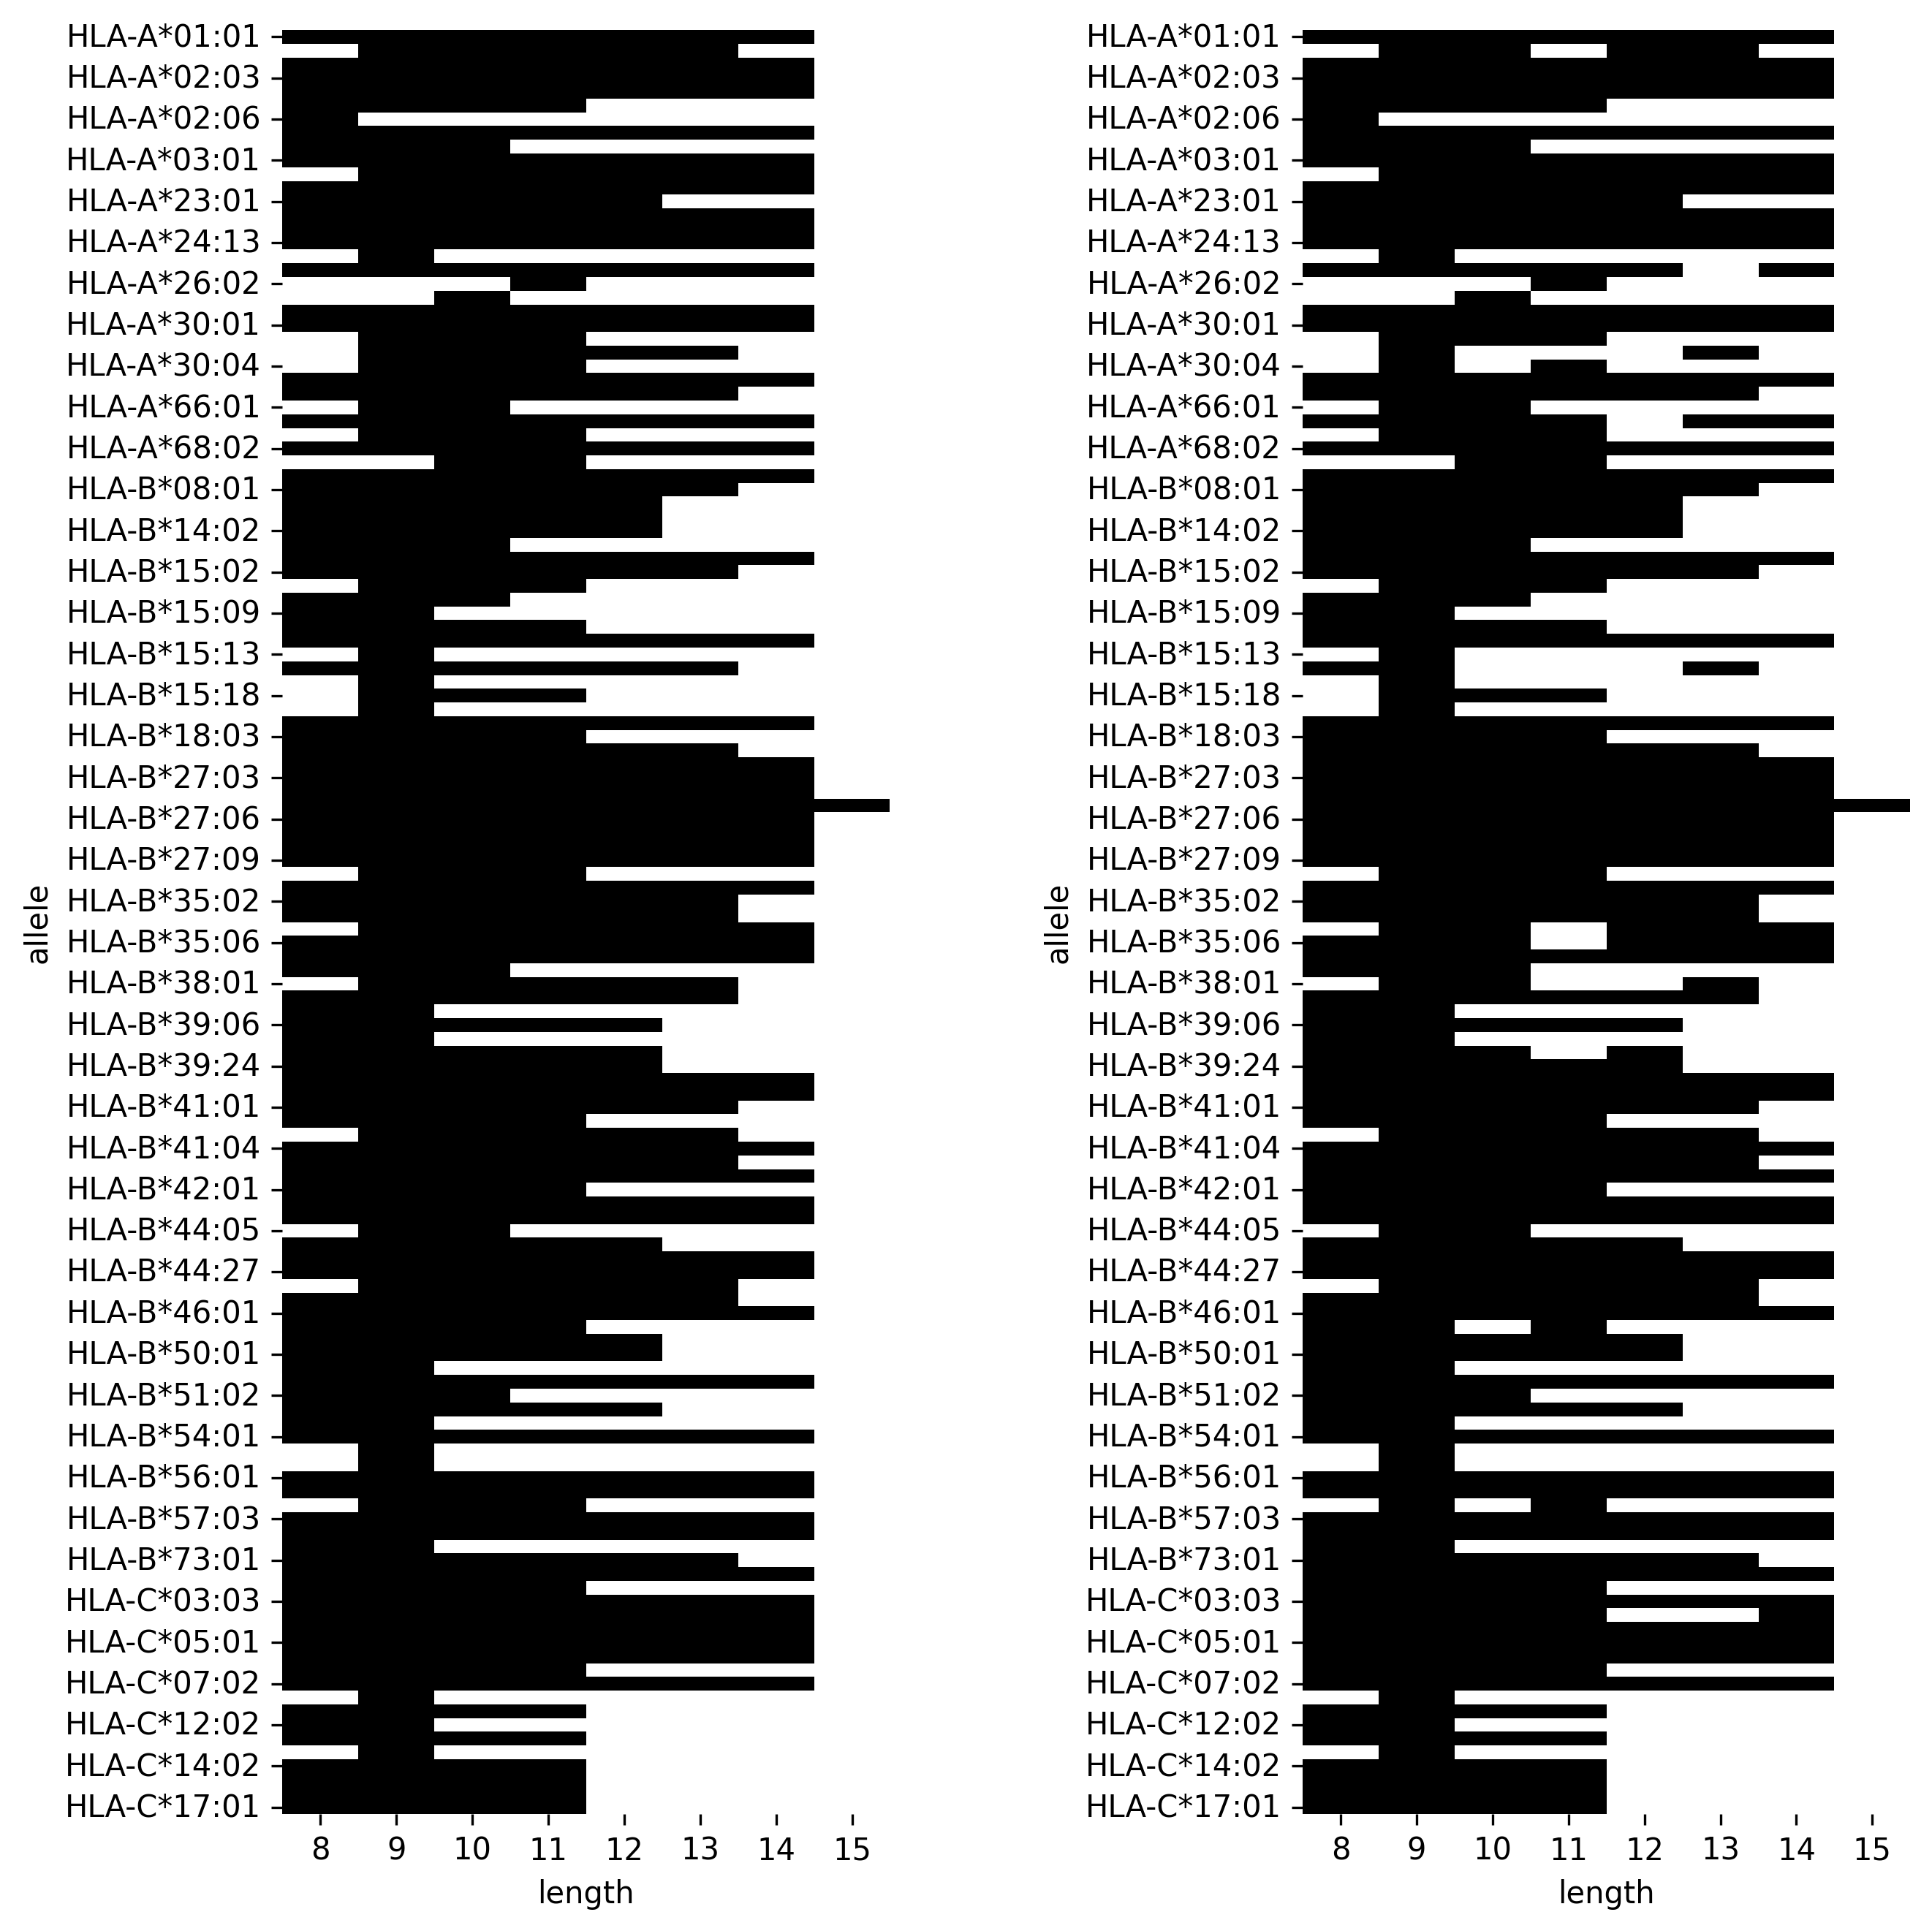

In [19]:
visualize_length(fold_train,0)

In [20]:
## Function to clean peptide data 

def Padding_trim_peptide(data_df):
    data_df["clean_peptide"] = data_df["peptide"].str.pad(9,side='right',fillchar='0') #Padding 
    data_df["clean_peptide"] = data_df["clean_peptide"].str.slice(0,9) # trimming 
    data_df["new_length"] = data_df["clean_peptide"].str.len() # Update peptide length
    return data_df
    

In [21]:
fold_train = Padding_trim_peptide(fold_train)
fold_test = Padding_trim_peptide(fold_test)

In [22]:
fold_test

,peptide,hit,allele,data,length,clean_peptide,new_length
0,AAPATRAAL,1,HLA-B*35:03,fold_test,9,AAPATRAAL,9
1,AAPSAAREL,1,HLA-B*35:03,fold_test,9,AAPSAAREL,9
2,AEISQIHQSVTD,1,HLA-B*35:03,fold_test,12,AEISQIHQS,9
3,ALEEQLQQIRAE,1,HLA-B*35:03,fold_test,12,ALEEQLQQI,9
4,AQDPLLLQM,1,HLA-B*35:03,fold_test,9,AQDPLLLQM,9
...,...,...,...,...,...,...,...
946136,YDPEAVLPEHLRQH,0,HLA-A*02:11,fold_test,14,YDPEAVLPE,9
946137,TGAVGVVGRSASFA,0,HLA-A*02:11,fold_test,14,TGAVGVVGR,9
946138,KITLRRFSVVEKSD,0,HLA-A*02:11,fold_test,14,KITLRRFSV,9
946139,RVLELLQKNRDMTF,0,HLA-A*02:11,fold_test,14,RVLELLQKN,9


In [23]:
fold_train.to_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_train.csv",index=False)
fold_test.to_csv("/home/gaurav/Gaurav/Berlin/Proposals/Test/InstaDeep/data/fold_test.csv",index=False)